In [742]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [743]:
ameo = pd.read_csv("/Users/sayedrizwan/Downloads/data.xlsx - Sheet1.csV")

In [744]:
ameo.shape

(3998, 39)

In [745]:
ameo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [746]:
ameo.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [747]:
ameo.duplicated().sum()

0

In [748]:
ameo.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [749]:
ameo.nunique()

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

##### As Unnamed: 0 has only one unique value, it does not make any sense and will not be useful further. So we will delete it.

In [750]:
ameo = ameo.drop(columns = "Unnamed: 0")

In [751]:
ameo.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [752]:
ameo.head(5)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


Here DOJ, DOL and Graduation Year is not in the date time format. So first we will be converting it into required format using pandas.
But before that we need to replace "present" in DOL with 2015-12-31, i.e. last day of the year in which survey was conducted.

In [753]:
ameo["DOL"].replace("present", "2015-12-31", inplace = True)

In [754]:
ameo["DOL"] = pd.to_datetime(ameo["DOL"])
ameo["DOJ"] = pd.to_datetime(ameo["DOJ"])
ameo["GraduationYear"] = pd.to_datetime(ameo["GraduationYear"])

In [755]:
ameo.dtypes

ID                                int64
Salary                          float64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                      object
JobCity                          object
Gender                           object
DOB                              object
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear           datetime64[ns]
English                           int64
Logical                           int64
Quant                             int64


In [756]:
ameo[(ameo['DOL'] < ameo['DOJ'])].shape[0]

40

## There are 40 such rows where Date of joining is after date of Leaving. This is practically impossible. So it implies that it is an error and we should drop these 40 rows.

In [757]:
ameo = ameo.drop(ameo[ameo['DOL'] < ameo['DOJ']].index)

In [758]:
ameo.shape

(3958, 38)

In [759]:
(ameo == -1).sum()

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    242
ComputerProgramming       863
ElectronicsAndSemicon    2828
ComputerScience          3067
MechanicalEngg           3723
ElectricalEngg           3802
TelecomEngg              3586
CivilEngg                3916
conscienti

In [760]:
((ameo == -1).sum()/3958)*100

ID                        0.000000
Salary                    0.000000
DOJ                       0.000000
DOL                       0.000000
Designation               0.000000
JobCity                   0.000000
Gender                    0.000000
DOB                       0.000000
10percentage              0.000000
10board                   0.000000
12graduation              0.000000
12percentage              0.000000
12board                   0.000000
CollegeID                 0.000000
CollegeTier               0.000000
Degree                    0.000000
Specialization            0.000000
collegeGPA                0.000000
CollegeCityID             0.000000
CollegeCityTier           0.000000
CollegeState              0.000000
GraduationYear            0.000000
English                   0.000000
Logical                   0.000000
Quant                     0.000000
Domain                    6.114199
ComputerProgramming      21.803941
ElectronicsAndSemicon    71.450227
ComputerScience     

As -1 indicates subjects not attempted, we have calculated percentage of -1 (not attempted) values. As columns
with higher percentasge of -1 values might cause error further while plotting graphs due to outliers issue, we will
be deleting all columns with more than 90% -1 values. 
For remaining columns we will be replacinf -1 by 0.

In [761]:
ameo = ameo.drop(columns = ['MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'])

In [762]:
ameo["Domain"].replace(-1, 0, inplace = True)
ameo["ComputerProgramming"].replace(-1, 0, inplace = True)
ameo["ElectronicsAndSemicon"].replace(-1, 0, inplace = True)
ameo["ComputerScience"].replace(-1, 0, inplace = True)

In [763]:
(ameo == 0).sum()

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier          2769
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    242
ComputerProgramming       863
ElectronicsAndSemicon    2828
ComputerScience          3067
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to

In [764]:
ameo.shape

(3958, 34)

As you can see we have deleted unwanted columns and replaced -1 values with 0

In [765]:
ameo.dtypes

ID                                int64
Salary                          float64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                      object
JobCity                          object
Gender                           object
DOB                              object
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear           datetime64[ns]
English                           int64
Logical                           int64
Quant                             int64


Here about 9 columns have "object" data type. This data type is less efficient in further analysis. So it is better
to convert them to strings or categorical columns. columns with less unique values will be converted to categorical
data types and with more unique values will be converted to string data type.
DOB column will be converted to datetime format.

In [766]:
ameo.select_dtypes(include="object").nunique()

Designation        417
JobCity            338
Gender               2
DOB               1865
10board            275
12board            340
Degree               4
Specialization      46
CollegeState        26
dtype: int64

In [767]:
ameo["Designation"] = ameo["Designation"].astype(str)
ameo["10board"] = ameo["10board"].astype(str)
ameo["12board"] = ameo["12board"].astype(str)
ameo["JobCity"] = ameo["JobCity"].astype(str)

ameo["Gender"] = ameo["Gender"].astype("category")
ameo["Degree"] = ameo["Degree"].astype("category")
ameo["Specialization"] = ameo["Specialization"].astype("category")
ameo["CollegeState"] = ameo["CollegeState"].astype("category")

In [768]:
ameo["DOB"] = pd.to_datetime(ameo["DOB"])

In [769]:
ameo.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

In [770]:
(ameo == 0).sum()

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier          2769
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    242
ComputerProgramming       863
ElectronicsAndSemicon    2828
ComputerScience          3067
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to

Here we will be replacing all NA values with median as it is a numerical column. for categorical column we use mode.

In [771]:
ameo["Domain"].fillna(ameo["Domain"].median(), inplace = True)
ameo["ComputerProgramming"].fillna(ameo["ComputerProgramming"].median(), inplace = True)
ameo["ElectronicsAndSemicon"].fillna(ameo["ElectronicsAndSemicon"].median(), inplace = True)
ameo["ComputerScience"].fillna(ameo["ComputerScience"].median(), inplace = True)

In [772]:
(ameo == 0).sum()

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier          2769
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    242
ComputerProgramming       863
ElectronicsAndSemicon    2828
ComputerScience          3067
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to

In [773]:
## Usually columns are truncated and only a few columns are showed. To over come this problem we use below command
## so that 50 columns are visible for us 

pd.set_option('display.max_columns',50)

In [774]:
ameo.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,1970-01-01 00:00:00.000002011,515,585,525,0.635979,445,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,1970-01-01 00:00:00.000002012,695,610,780,0.960603,0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,1970-01-01 00:00:00.000002014,615,545,370,0.450877,395,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,1970-01-01 00:00:00.000002011,635,585,625,0.974396,615,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,1970-01-01 00:00:00.000002012,545,625,465,0.124502,0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


Now we will be adding 2 more columns here
1. Age (2015 - DOB)
2. Tenure (DOL - DOJ)

In [775]:
ameo["Age"] = 2015 - ameo["DOB"].dt.year

In [776]:
ameo["Tenure"] = (ameo["DOL"].dt.date - ameo["DOJ"].dt.date).dt.days

In [777]:
ameo.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,Tenure
0,203097,420000.0,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,1970-01-01 00:00:00.000002011,515,585,525,0.635979,445,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25,1308
1,579905,500000.0,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,1970-01-01 00:00:00.000002012,695,610,780,0.960603,0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26,851
2,810601,325000.0,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,1970-01-01 00:00:00.000002014,615,545,370,0.450877,395,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23,578
3,267447,1100000.0,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,1970-01-01 00:00:00.000002011,635,585,625,0.974396,615,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,26,1644
4,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,1970-01-01 00:00:00.000002012,545,625,465,0.124502,0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24,365


# UNIVARIATE DATA

## Numerical Data

#### 1. Salary

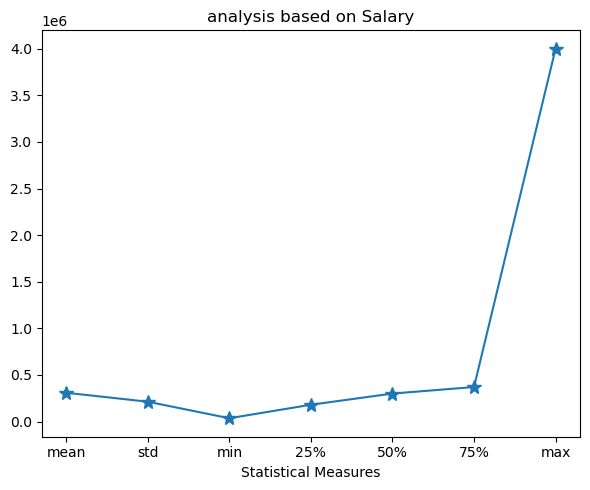

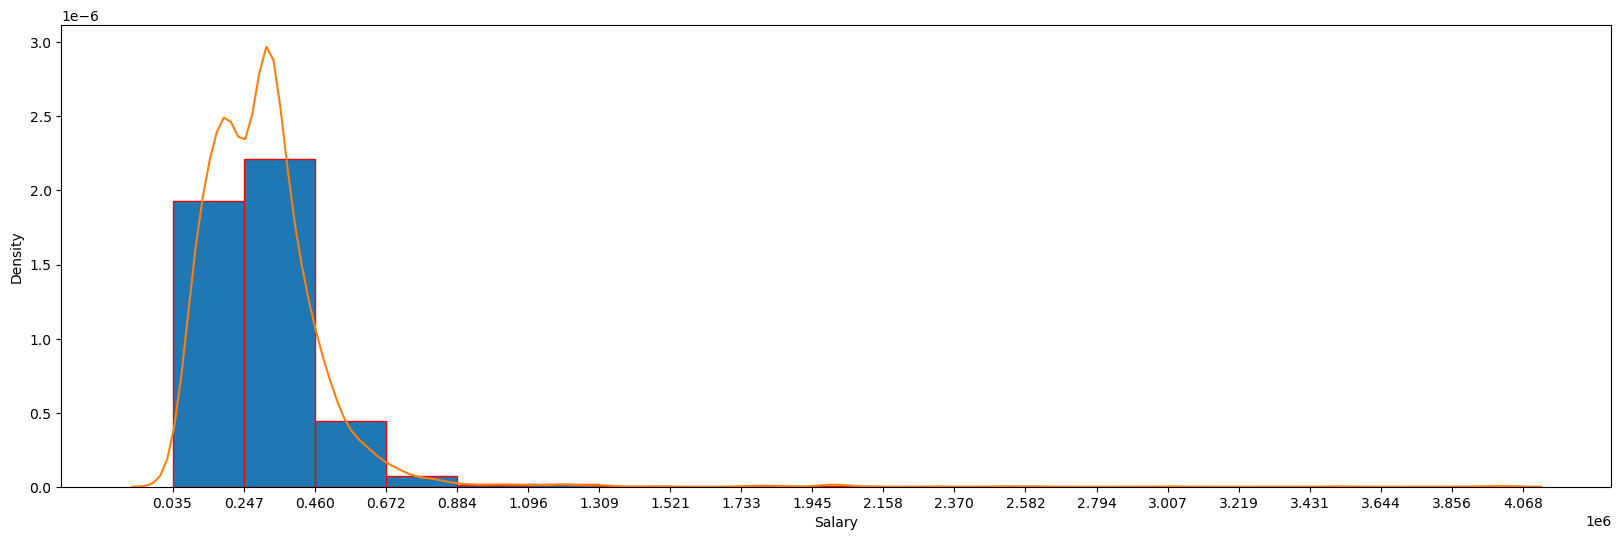

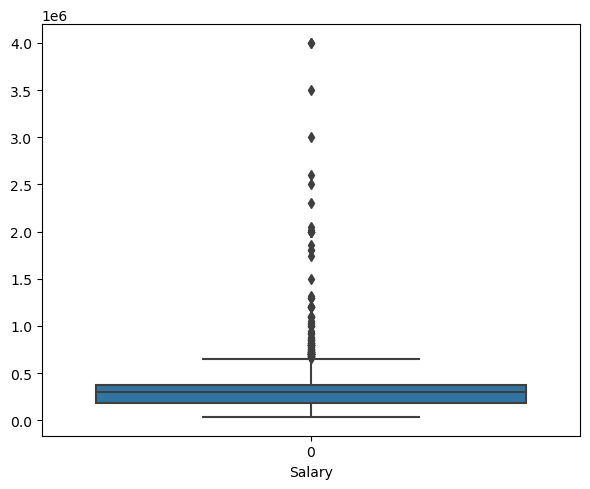

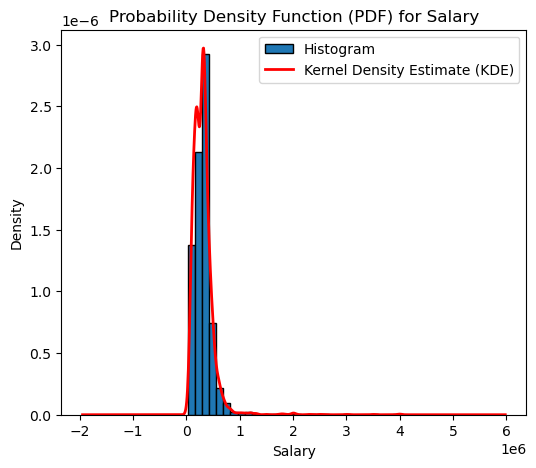

In [778]:
# summary Plot

plt.figure(figsize=(6, 5))
ameo["Salary"].describe()[1:].plot(marker = '*', markersize = 10)
plt.title("analysis based on Salary")
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(ameo["Salary"].min(), ameo["Salary"].max()+ameo["Salary"].std(),
                 ameo["Salary"].std())
plt.figure(figsize = (20,6))
plt.hist(ameo["Salary"], bins = bins, edgecolor = "red", density = True)
plt.xticks(bins)
plt.xlabel("Salary")
plt.ylabel("Density")
sns.kdeplot(ameo["Salary"])
plt.show()


# Box Plot

plt.figure(figsize=(6,5))
sns.boxplot(ameo["Salary"])
plt.xlabel("Salary")
plt.tight_layout()
plt.show()

# PDF

salary_values = ameo["Salary"]
plt.figure(figsize=(6, 5))
plt.hist(salary_values, density=True, bins=30, edgecolor='black', label='Histogram')
salary_values.plot.kde(color='red', linewidth=2, label='Kernel Density Estimate (KDE)')
plt.xlabel("Salary")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF) for Salary")
plt.legend()
plt.show()

###### Conclusion:
1. Summary Plot: There is a great difference between Mean and Max Values which clearly implies there are 
    significant number of outliers.
2. Histogram: It is a positive skewed histogram
3. Box Plot: About 75% of the employees have their salaries in lower range with a substantial number of 
    employees ith higher salaries
4. PDF: It has 2 peaks with maximum concentration in the positive skew.

#### 2. 10th Percentage

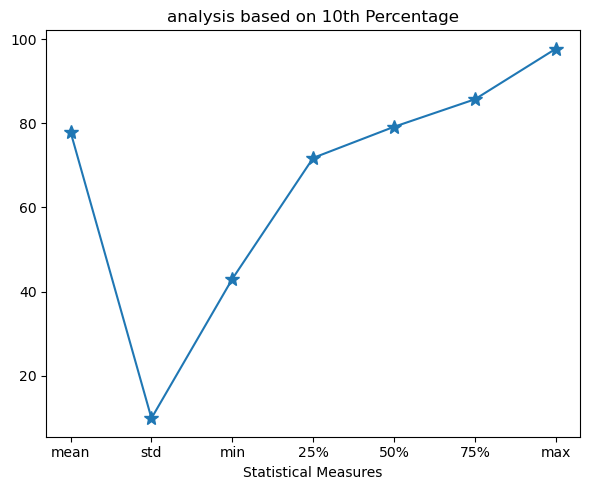

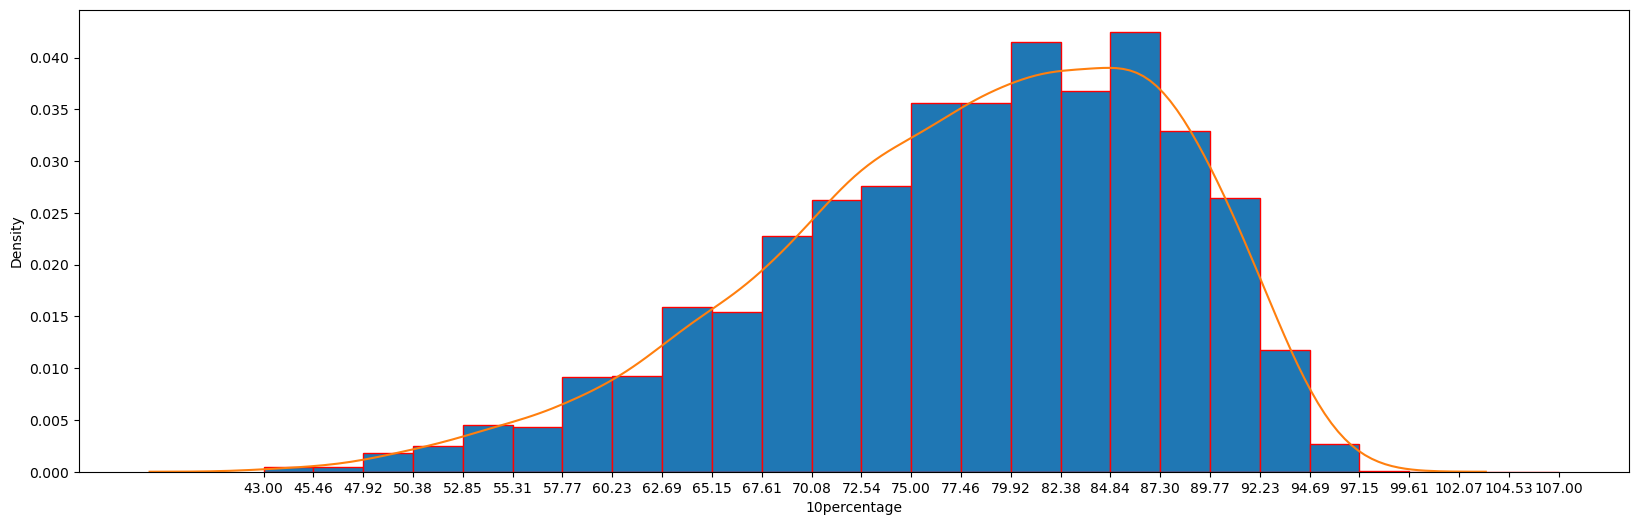

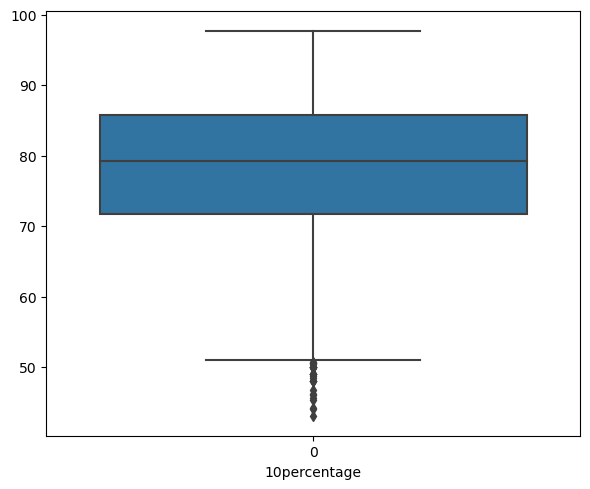

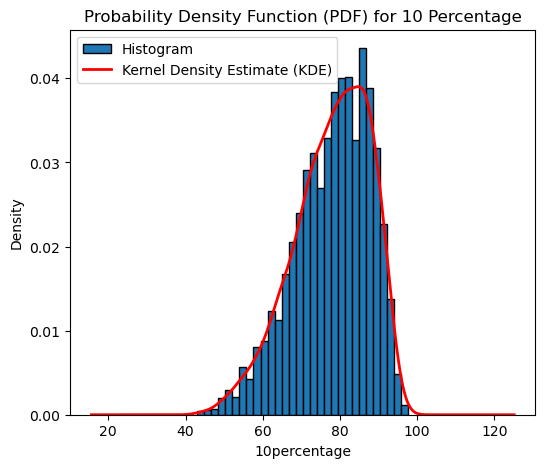

In [779]:
# summary Plot

plt.figure(figsize=(6, 5))
ameo["10percentage"].describe()[1:].plot(marker = '*', markersize = 10)
plt.title("analysis based on 10th Percentage")
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(ameo["10percentage"].min(), ameo["10percentage"].max()+ameo["10percentage"].std(),
                 ameo["10percentage"].std()/4)
plt.figure(figsize = (20,6))
plt.hist(ameo["10percentage"], bins = bins, edgecolor = "red", density = True)
plt.xticks(bins)
plt.xlabel("10percentage")
plt.ylabel("Density")
sns.kdeplot(ameo["10percentage"])
plt.show()


# Box Plot

plt.figure(figsize=(6,5))
sns.boxplot(ameo["10percentage"])
plt.xlabel("10percentage")
plt.tight_layout()
plt.show()

# PDF

salary_values = ameo["10percentage"]
plt.figure(figsize=(6, 5))
plt.hist(salary_values, density=True, bins=30, edgecolor='black', label='Histogram')
salary_values.plot.kde(color='red', linewidth=2, label='Kernel Density Estimate (KDE)')
plt.xlabel("10percentage")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF) for 10 Percentage")
plt.legend()
plt.show()

###### Conclusion:
1. Summary Plot: Average score of employees is 80% and difference small difference between mean value and 
    maximum score.
2. Histogram: It is left skewed data, that means mostly employees have scored good marks
3. Box Plot: There are a few outliers in the lower range of marks.
4. PDF: It is a single peak PDF with left skewed data.

#### 3. 12th Percentage

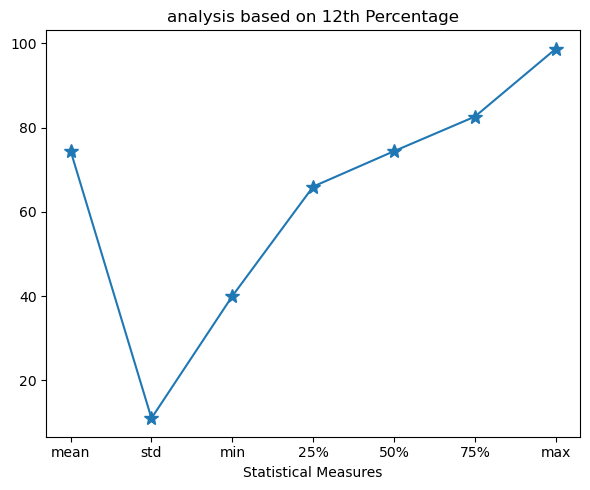

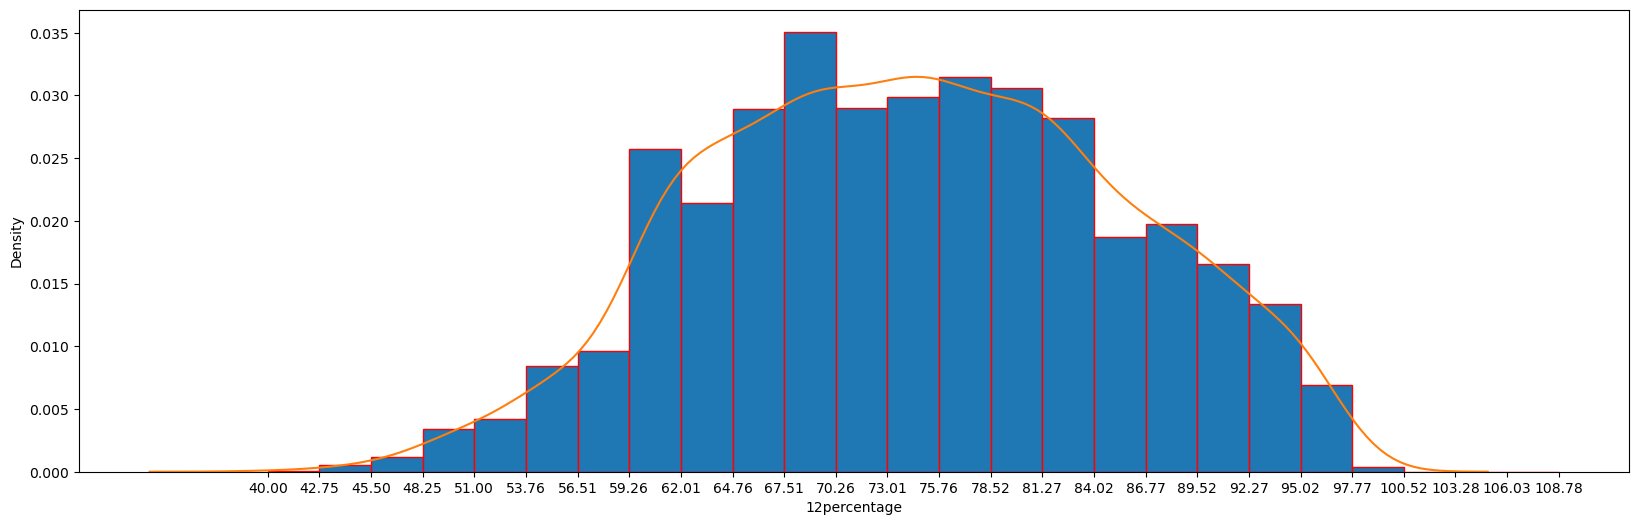

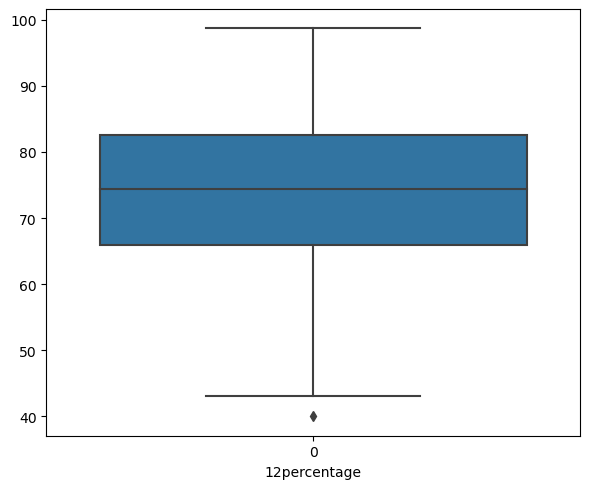

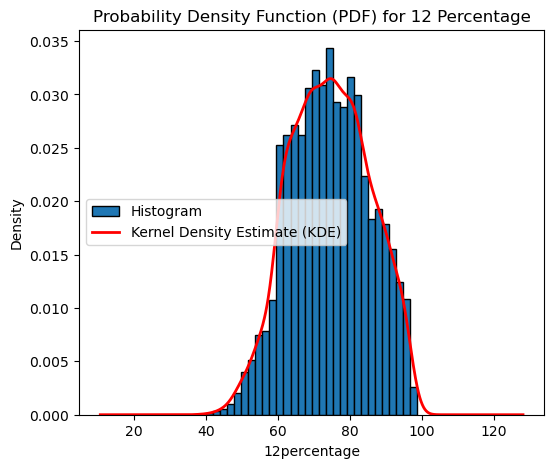

In [780]:
# summary Plot

plt.figure(figsize=(6, 5))
ameo["12percentage"].describe()[1:].plot(marker = '*', markersize = 10)
plt.title("analysis based on 12th Percentage")
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(ameo["12percentage"].min(), ameo["12percentage"].max()+ameo["12percentage"].std(),
                 ameo["12percentage"].std()/4)
plt.figure(figsize = (20,6))
plt.hist(ameo["12percentage"], bins = bins, edgecolor = "red", density = True)
plt.xticks(bins)
plt.xlabel("12percentage")
plt.ylabel("Density")
sns.kdeplot(ameo["12percentage"])
plt.show()


# Box Plot

plt.figure(figsize=(6,5))
sns.boxplot(ameo["12percentage"])
plt.xlabel("12percentage")
plt.tight_layout()
plt.show()

# PDF

salary_values = ameo["12percentage"]
plt.figure(figsize=(6, 5))
plt.hist(salary_values, density=True, bins=30, edgecolor='black', label='Histogram')
salary_values.plot.kde(color='red', linewidth=2, label='Kernel Density Estimate (KDE)')
plt.xlabel("12percentage")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF) for 12 Percentage")
plt.legend()
plt.show()

###### Conclusion:
1. Summary Plot: Mean is almost equidistant from min values and max values, that means the data is well spread
    throughout the graph.
2. Histogram: Min percentage is 42% and max is 100% with most of the percentage between 60% to 80%.
3. Box Plot: There is a only one outlier, so the margin of error is very low.
4. PDF: It is a negative skewed PDF but very close to uniform distribution.

#### 4. College GPA

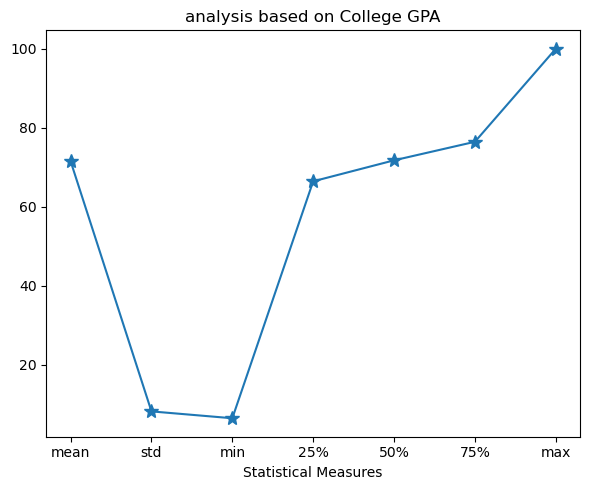

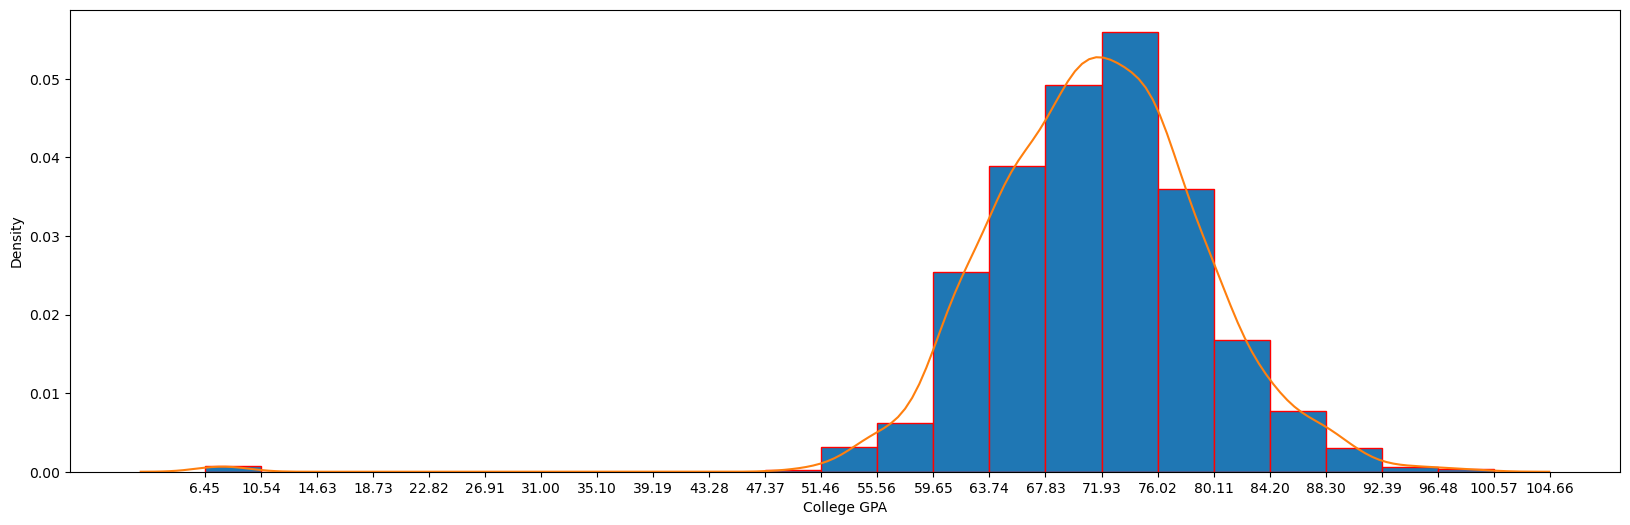

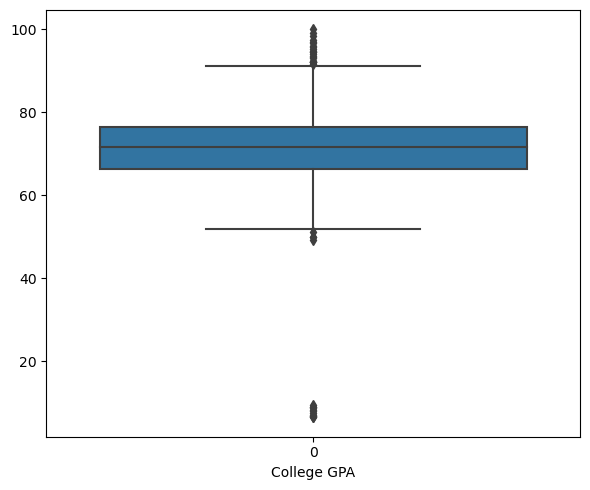

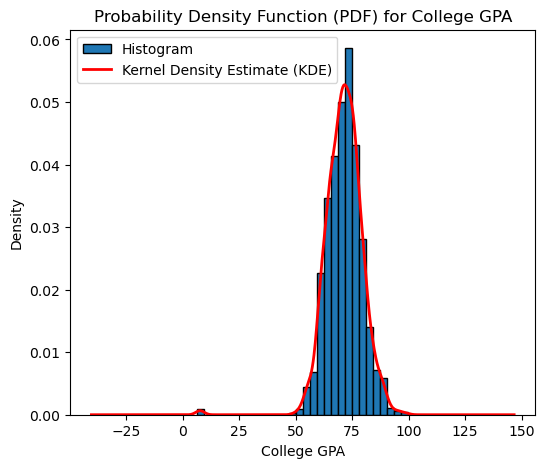

In [781]:
# summary Plot

plt.figure(figsize=(6, 5))
ameo["collegeGPA"].describe()[1:].plot(marker = '*', markersize = 10)
plt.title("analysis based on College GPA")
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(ameo["collegeGPA"].min(), ameo["collegeGPA"].max()+ameo["collegeGPA"].std(),
                 ameo["collegeGPA"].std()/2)
plt.figure(figsize = (20,6))
plt.hist(ameo["collegeGPA"], bins = bins, edgecolor = "red", density = True)
plt.xticks(bins)
plt.xlabel("College GPA")
plt.ylabel("Density")
sns.kdeplot(ameo["collegeGPA"])
plt.show()


# Box Plot

plt.figure(figsize=(6,5))
sns.boxplot(ameo["collegeGPA"])
plt.xlabel("College GPA")
plt.tight_layout()
plt.show()

# PDF

salary_values = ameo["collegeGPA"]
plt.figure(figsize=(6, 5))
plt.hist(salary_values, density=True, bins=30, edgecolor='black', label='Histogram')
salary_values.plot.kde(color='red', linewidth=2, label='Kernel Density Estimate (KDE)')
plt.xlabel("College GPA")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF) for College GPA")
plt.legend()
plt.show()

###### Conclusion:
1. Summary Plot: About 20% employees had scored above 75% CGPA.
2. Histogram: It is neagative skewed histogram with maximum students scoring between 65-80%.
3. Box Plot: It has many outliers both in lower range as well as higher range.
4. PDF:Almost all the employees have scored above 50% barring a few employees.

#### 5. English

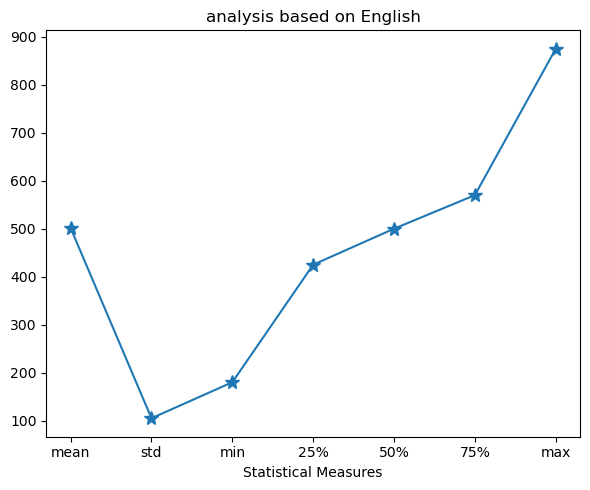

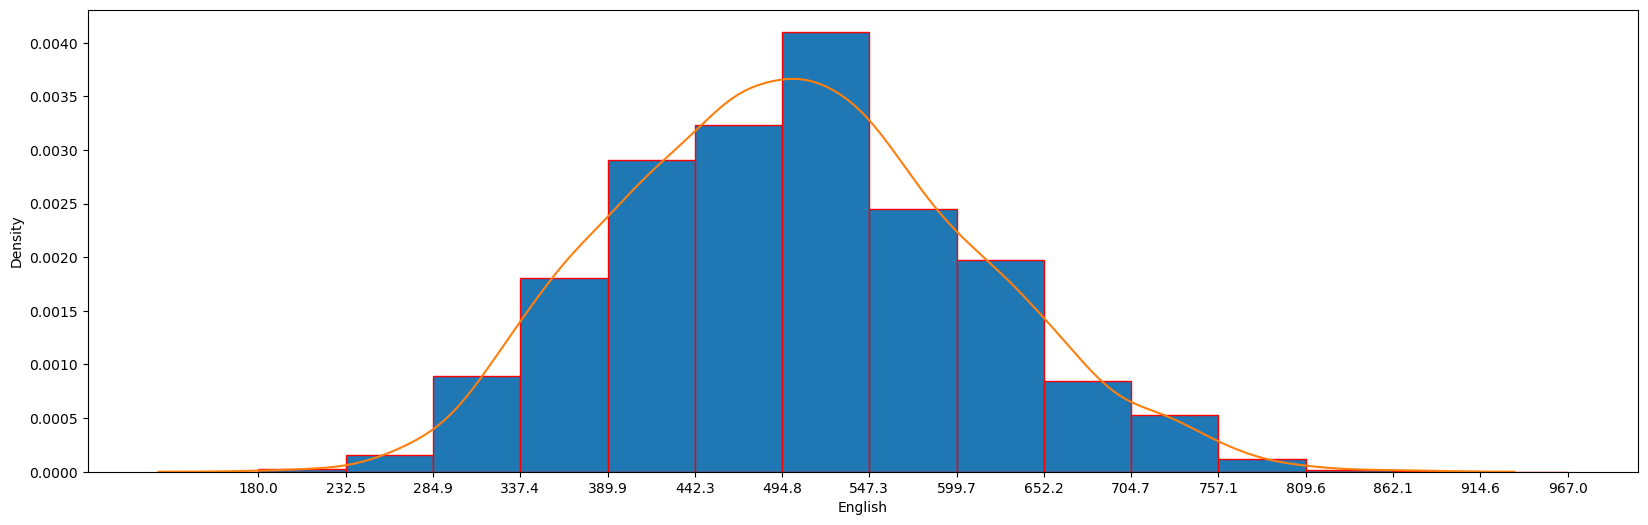

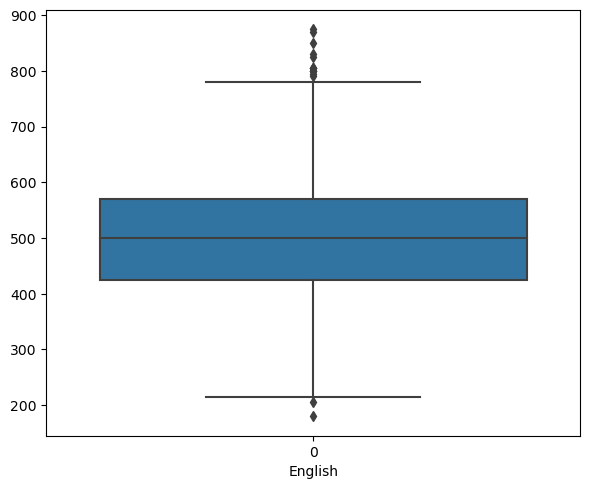

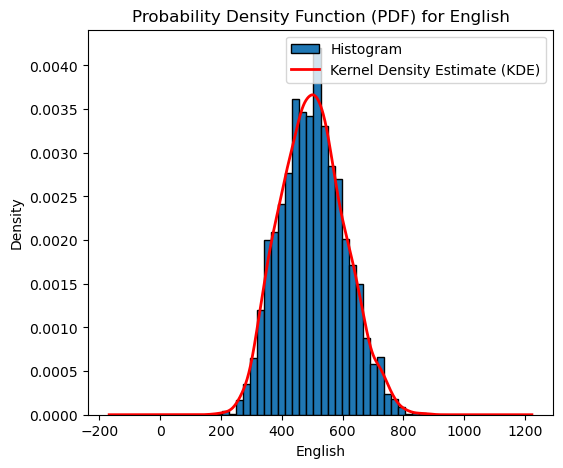

In [782]:
# summary Plot

plt.figure(figsize=(6, 5))
ameo["English"].describe()[1:].plot(marker = '*', markersize = 10)
plt.title("analysis based on English")
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(ameo["English"].min(), ameo["English"].max()+ameo["English"].std(),
                 ameo["English"].std()/2)
plt.figure(figsize = (20,6))
plt.hist(ameo["English"], bins = bins, edgecolor = "red", density = True)
plt.xticks(bins)
plt.xlabel("English")
plt.ylabel("Density")
sns.kdeplot(ameo["English"])
plt.show()


# Box Plot

plt.figure(figsize=(6,5))
sns.boxplot(ameo["English"])
plt.xlabel("English")
plt.tight_layout()
plt.show()

# PDF

salary_values = ameo["English"]
plt.figure(figsize=(6, 5))
plt.hist(salary_values, density=True, bins=30, edgecolor='black', label='Histogram')
salary_values.plot.kde(color='red', linewidth=2, label='Kernel Density Estimate (KDE)')
plt.xlabel("English")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF) for English")
plt.legend()
plt.show()

###### Conclusion:
1. Summary Plot: Mean is almost equally poised between min and max values which means employees have scored 
    low as wel as high marks in Eglish
2. Histogram: Most of the employees have score good in English with the range between 390-650 havimg maximum
    scorers.
3. Box Plot: There a few extreme high and extreme kow scorers.
4. PDF: It is a normal distribution graph.

#### 6. Logical

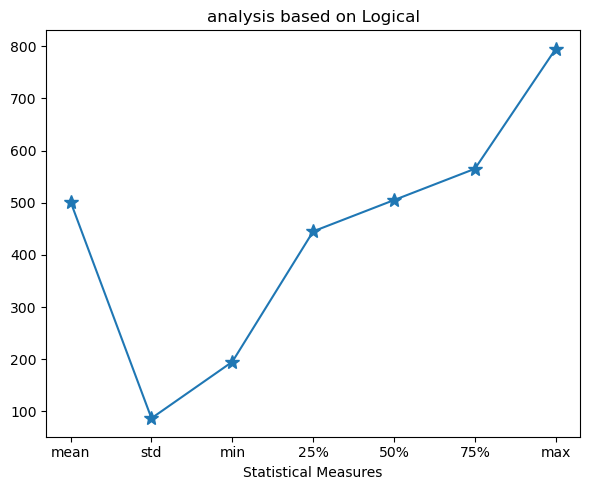

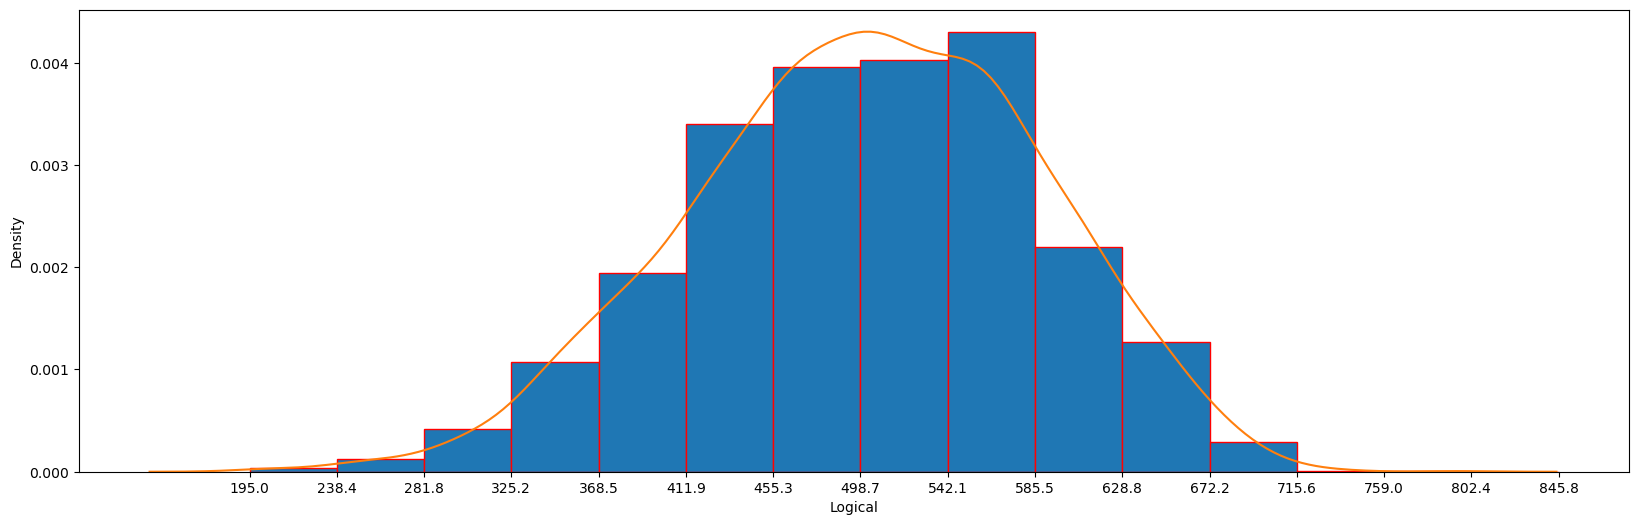

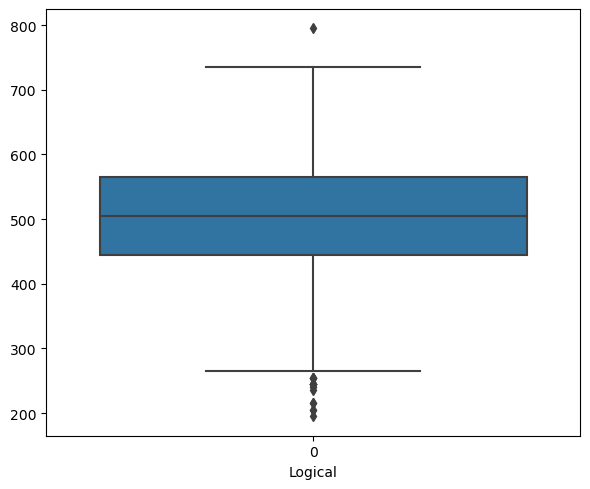

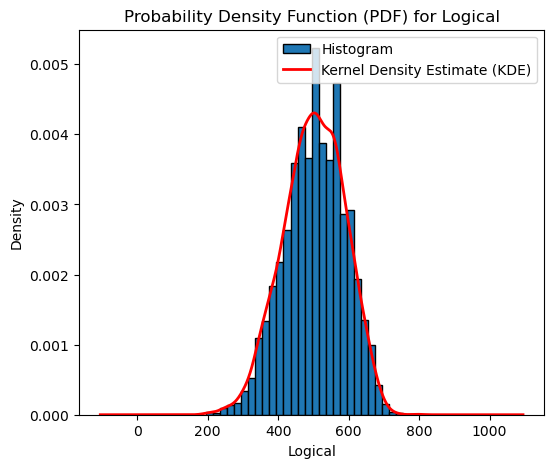

In [783]:
# summary Plot

plt.figure(figsize=(6, 5))
ameo["Logical"].describe()[1:].plot(marker = '*', markersize = 10)
plt.title("analysis based on Logical")
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(ameo["Logical"].min(), ameo["Logical"].max()+ameo["Logical"].std(),
                 ameo["Logical"].std()/2)
plt.figure(figsize = (20,6))
plt.hist(ameo["Logical"], bins = bins, edgecolor = "red", density = True)
plt.xticks(bins)
plt.xlabel("Logical")
plt.ylabel("Density")
sns.kdeplot(ameo["Logical"])
plt.show()


# Box Plot

plt.figure(figsize=(6,5))
sns.boxplot(ameo["Logical"])
plt.xlabel("Logical")
plt.tight_layout()
plt.show()

# PDF

salary_values = ameo["Logical"]
plt.figure(figsize=(6, 5))
plt.hist(salary_values, density=True, bins=30, edgecolor='black', label='Histogram')
salary_values.plot.kde(color='red', linewidth=2, label='Kernel Density Estimate (KDE)')
plt.xlabel("Logical")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF) for Logical")
plt.legend()
plt.show()

###### Conclusion:
1. Summary Plot: About 75% employees have scored less than 600.
2. Histogram: Employees have scored good in Logical Reasoning but still a few have fared poorly.
3. Box Plot: Only one employee have scored extremely good in Logical Reasoning and a few have scored 
    very badly.
4. PDF: It is slightly negative skewed data.

#### 7. Quant

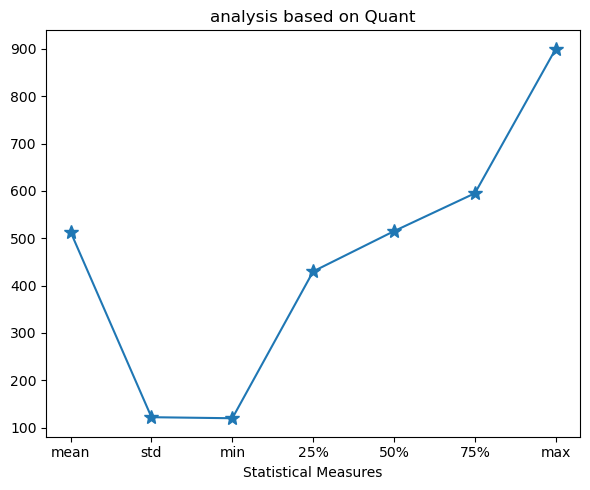

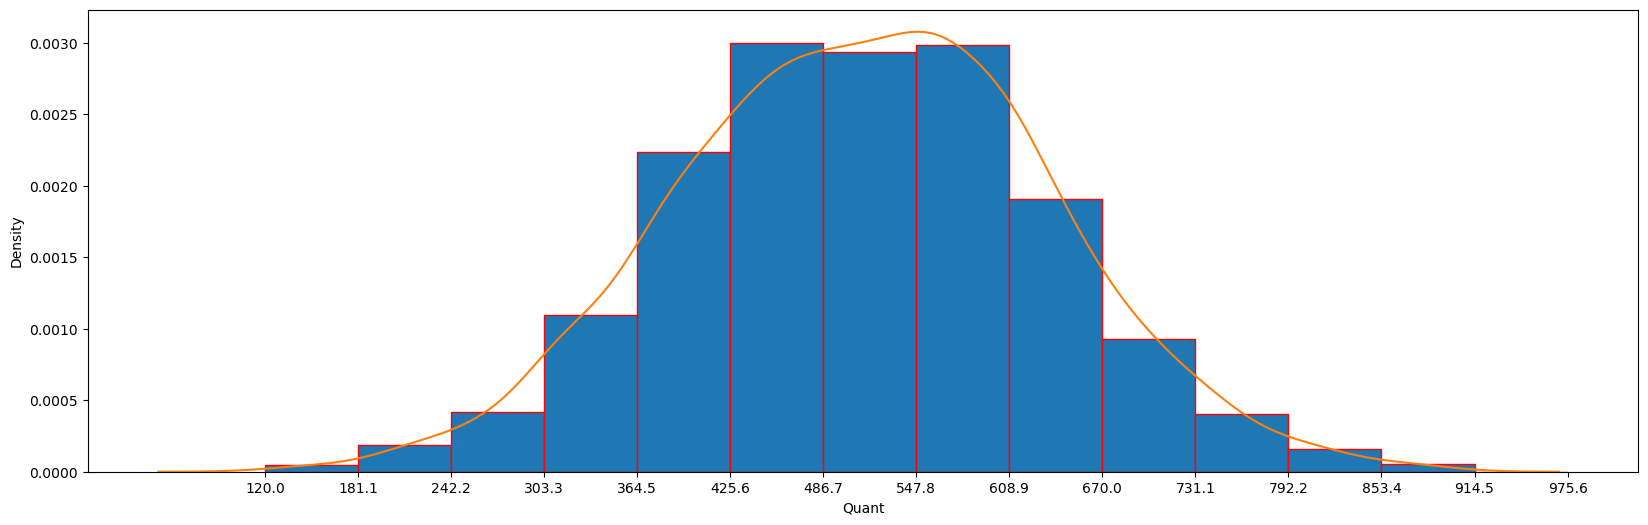

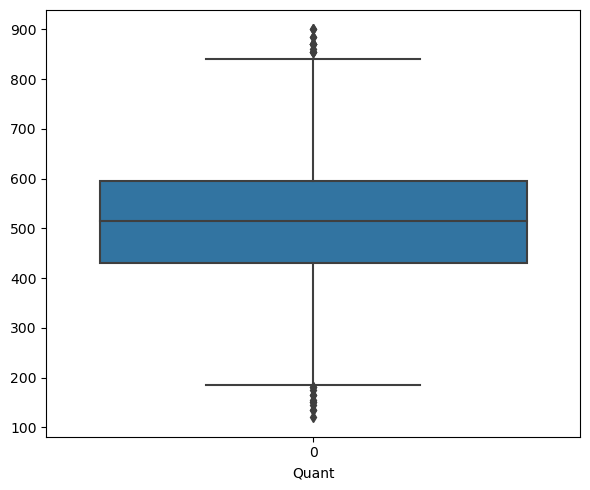

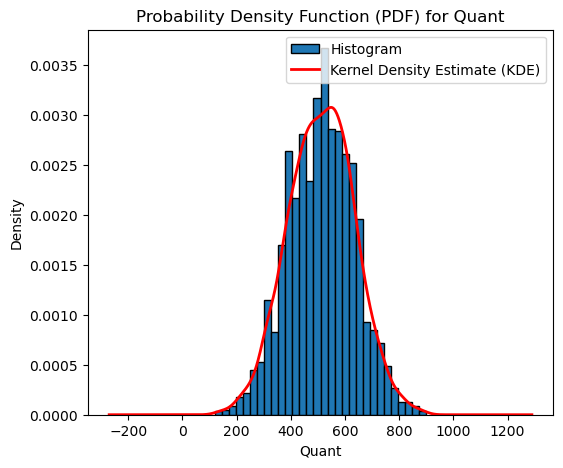

In [784]:
###### summary Plot

plt.figure(figsize=(6, 5))
ameo["Quant"].describe()[1:].plot(marker = '*', markersize = 10)
plt.title("analysis based on Quant")
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(ameo["Quant"].min(), ameo["Quant"].max()+ameo["Quant"].std(),
                 ameo["Quant"].std()/2)
plt.figure(figsize = (20,6))
plt.hist(ameo["Quant"], bins = bins, edgecolor = "red", density = True)
plt.xticks(bins)
plt.xlabel("Quant")
plt.ylabel("Density")
sns.kdeplot(ameo["Quant"])
plt.show()


# Box Plot

plt.figure(figsize=(6,5))
sns.boxplot(ameo["Quant"])
plt.xlabel("Quant")
plt.tight_layout()
plt.show()

# PDF

salary_values = ameo["Quant"]
plt.figure(figsize=(6, 5))
plt.hist(salary_values, density=True, bins=30, edgecolor='black', label='Histogram')
salary_values.plot.kde(color='red', linewidth=2, label='Kernel Density Estimate (KDE)')
plt.xlabel("Quant")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF) for Quant")
plt.legend()
plt.show()

###### Conclusion:
1. Summary Plot: About 50% employees have scored less than 510 in Quants.
2. Histogram: There are employees with very good Quants skill but also employees with very poor skills.
    Still most of the people have scored decently.
3. Box Plot: there are few employees with very high as well as very low scores.
4. PDF: It is very close to be called as uniform distribution.

#### 8. Domain

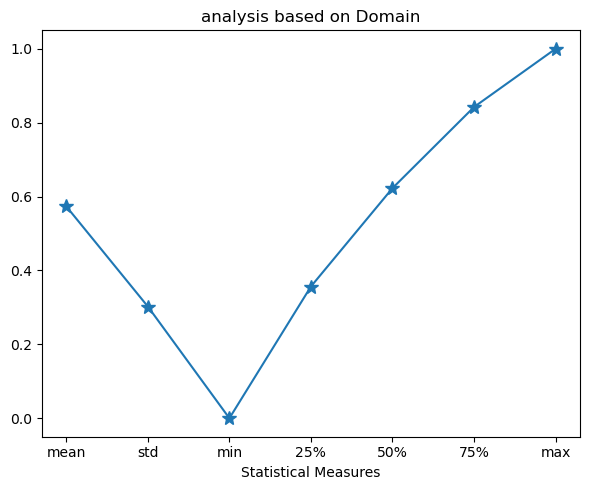

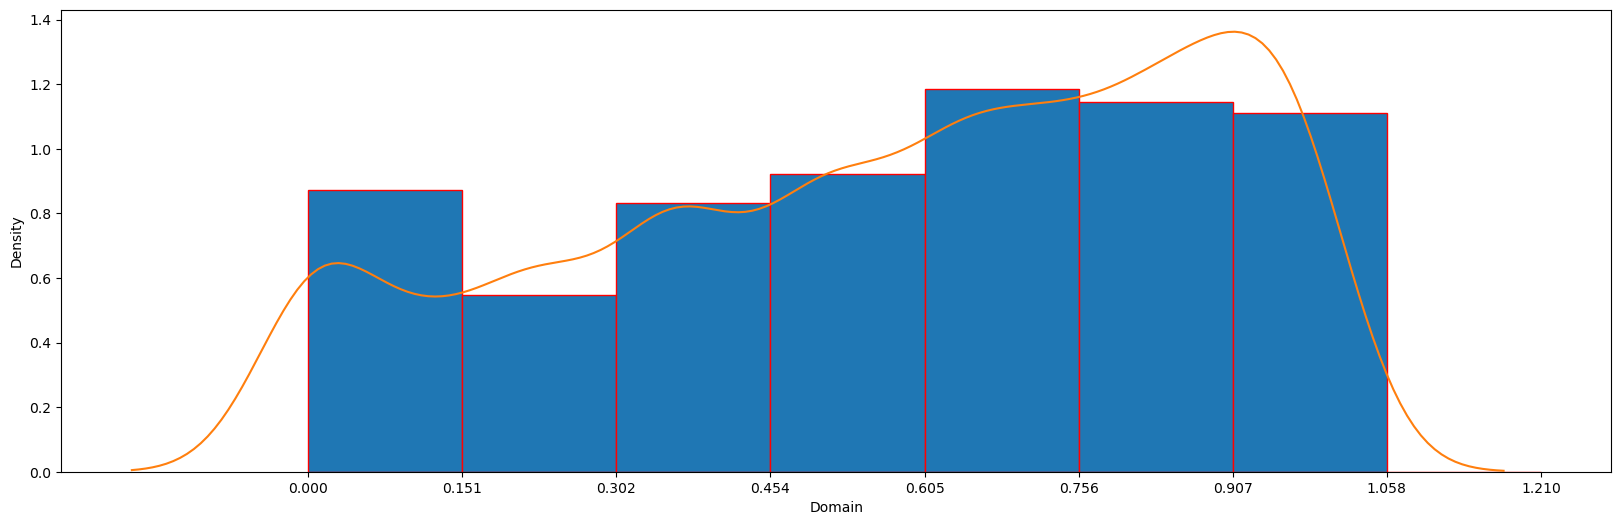

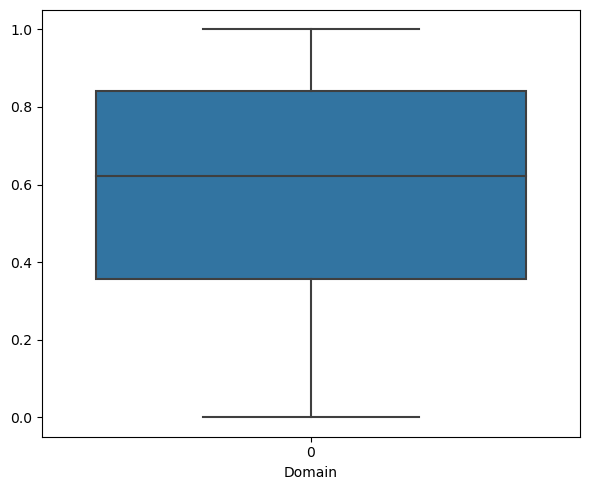

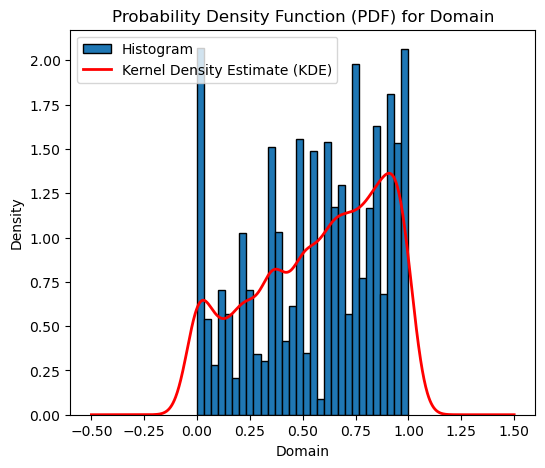

In [785]:
# summary Plot

plt.figure(figsize=(6, 5))
ameo["Domain"].describe()[1:].plot(marker = '*', markersize = 10)
plt.title("analysis based on Domain")
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(ameo["Domain"].min(), ameo["Domain"].max()+ameo["Domain"].std(),
                 ameo["Domain"].std()/2)
plt.figure(figsize = (20,6))
plt.hist(ameo["Domain"], bins = bins, edgecolor = "red", density = True)
plt.xticks(bins)
plt.xlabel("Domain")
plt.ylabel("Density")
sns.kdeplot(ameo["Domain"])
plt.show()


# Box Plot

plt.figure(figsize=(6,5))
sns.boxplot(ameo["Domain"])
plt.xlabel("Domain")
plt.tight_layout()
plt.show()

# PDF

salary_values = ameo["Domain"]
plt.figure(figsize=(6, 5))
plt.hist(salary_values, density=True, bins=30, edgecolor='black', label='Histogram')
salary_values.plot.kde(color='red', linewidth=2, label='Kernel Density Estimate (KDE)')
plt.xlabel("Domain")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF) for Domain")
plt.legend()
plt.show()

###### Conclusion:
1. Summary Plot: On an average employees have 0.6 in Domain.
2. Histogram: Employees have scored from 0 to 1 with almost equal frequecy in every range
3. Box Plot: There is not a single oulier.
4. PDF: There are many peaks but with very small drop. That implies employees have scored very badly as well as
    top scored in Domain.

#### 9. Computer Programming

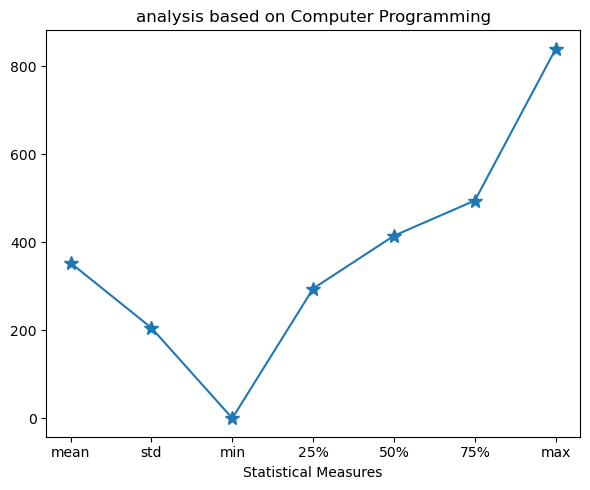

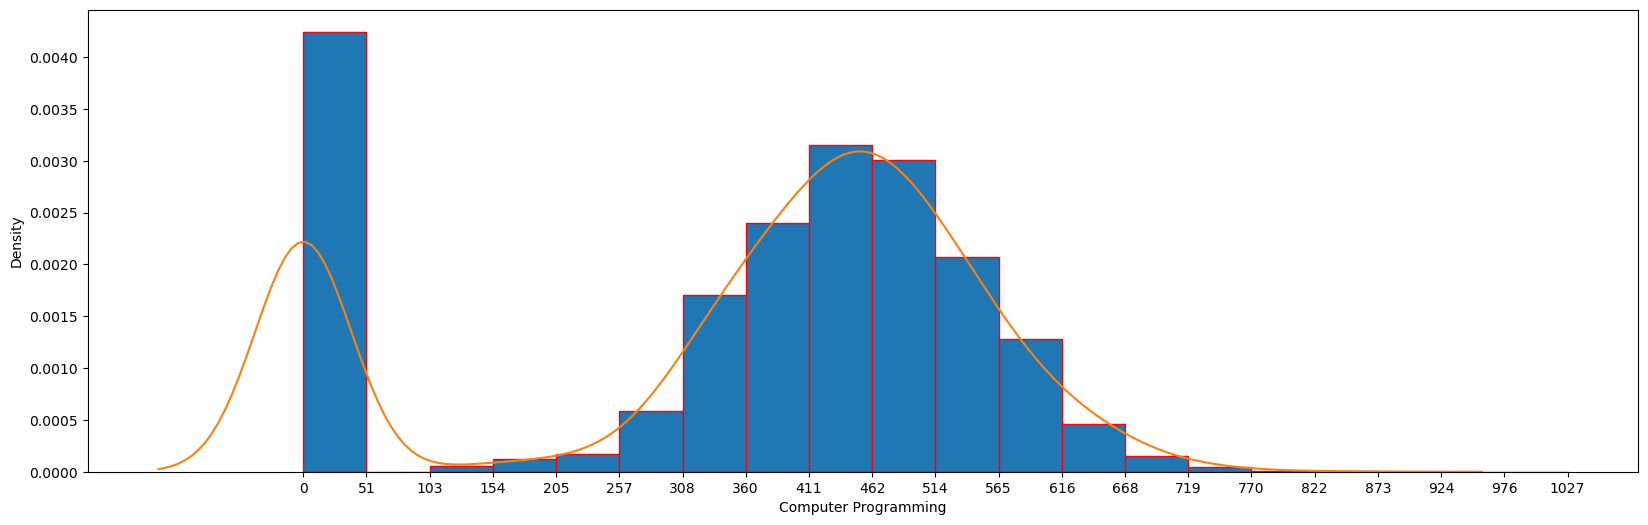

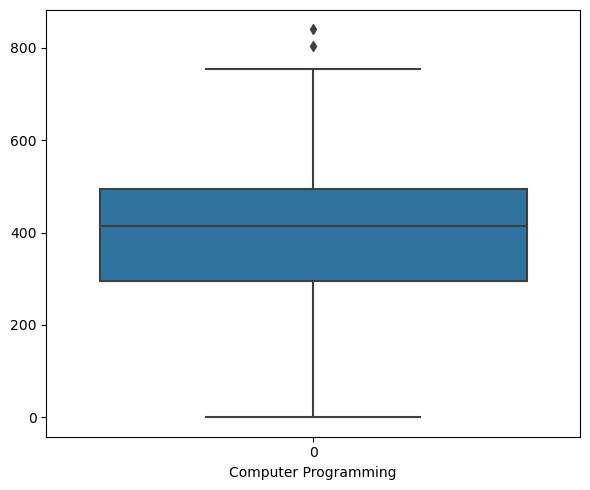

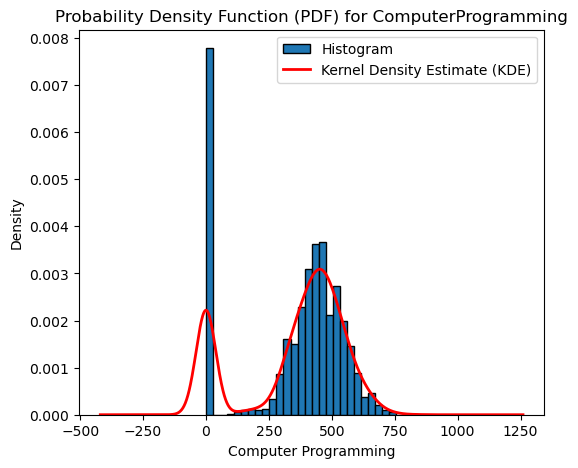

In [786]:
# summary Plot

plt.figure(figsize=(6, 5))
ameo["ComputerProgramming"].describe()[1:].plot(marker = '*', markersize = 10)
plt.title("analysis based on Computer Programming")
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(ameo["ComputerProgramming"].min(), 
                 ameo["ComputerProgramming"].max()+ameo["ComputerProgramming"].std(),
                 ameo["ComputerProgramming"].std()/4)
plt.figure(figsize = (20,6))
plt.hist(ameo["ComputerProgramming"], bins = bins, edgecolor = "red", density = True)
plt.xticks(bins)
plt.xlabel("Computer Programming")
plt.ylabel("Density")
sns.kdeplot(ameo["ComputerProgramming"])
plt.show()


# Box Plot

plt.figure(figsize=(6,5))
sns.boxplot(ameo["ComputerProgramming"])
plt.xlabel("Computer Programming")
plt.tight_layout()
plt.show()

# PDF

salary_values = ameo["ComputerProgramming"]
plt.figure(figsize=(6, 5))
plt.hist(salary_values, density=True, bins=30, edgecolor='black', label='Histogram')
salary_values.plot.kde(color='red', linewidth=2, label='Kernel Density Estimate (KDE)')
plt.xlabel("Computer Programming")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF) for ComputerProgramming")
plt.legend()
plt.show()

###### Conclusion:
1. Summary Plot: About 75% of Employees who had opted for Computer Programming have scored less than 410.
2. Histogram: A substantial amout of employees have scored less than 50 out of 1000 which has considerably
     brought down the average.
    averasge
3. Box Plot:Only few employees had got very high marks in Computer Programming.
4. PDF:It has 2 peaks with employees scoring low marks and then maximum smployees scoring between 350-550.

#### 10. Electronics And Semiconductors

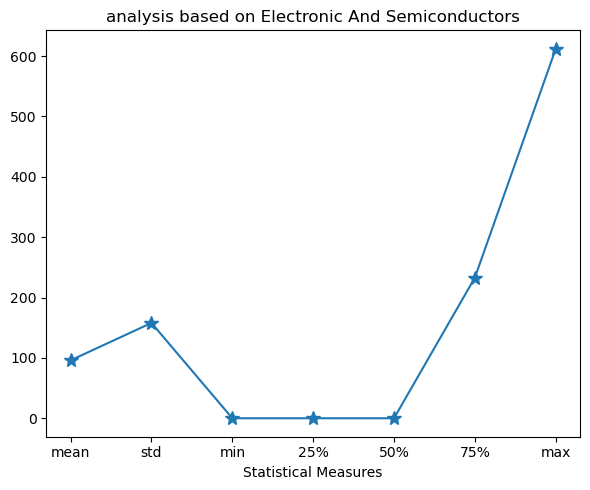

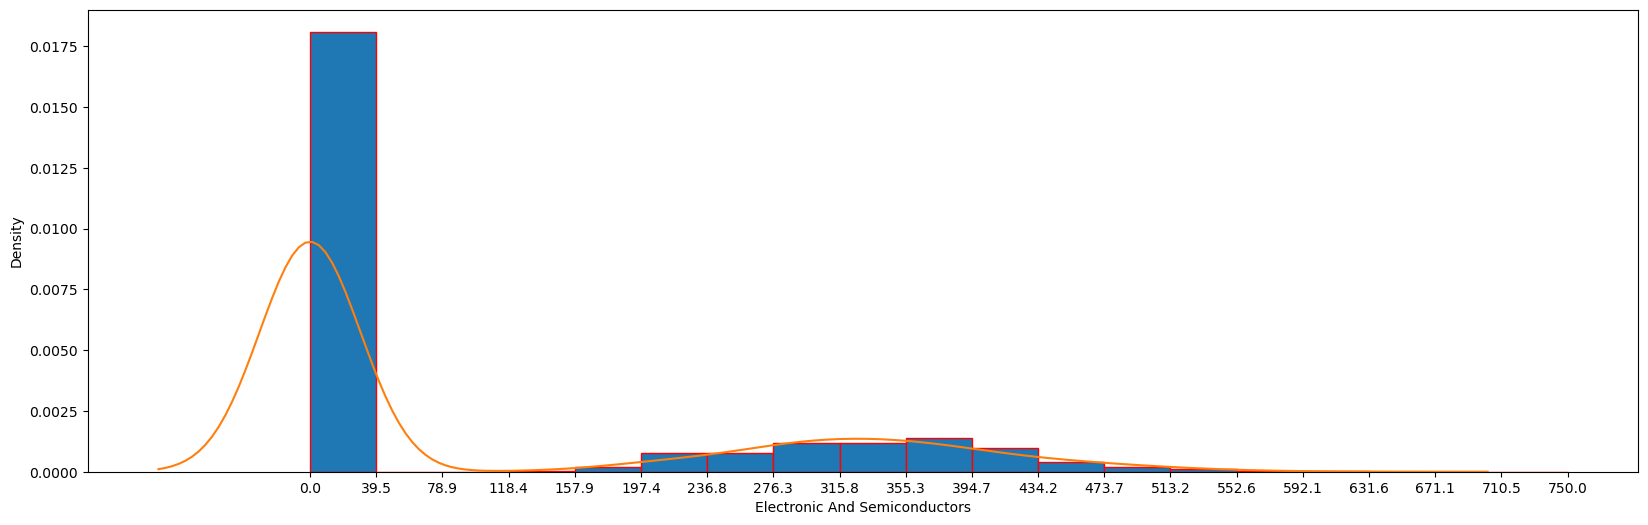

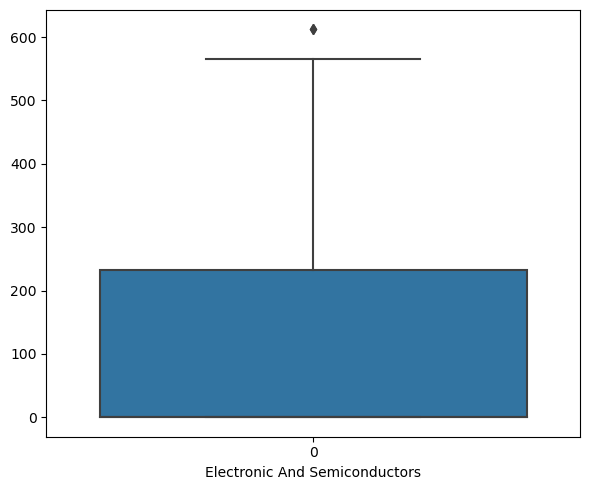

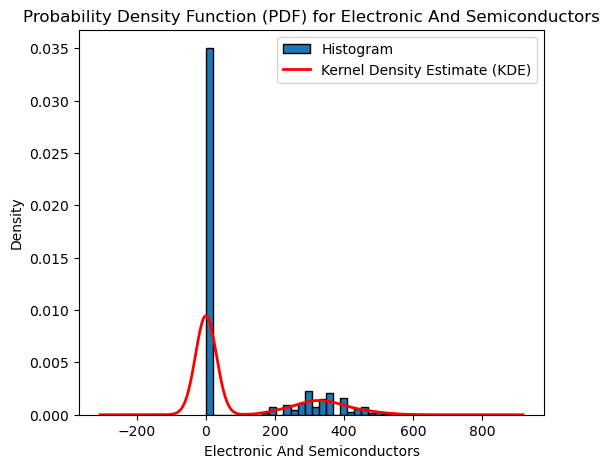

In [787]:
# summary Plot

plt.figure(figsize=(6, 5))
ameo["ElectronicsAndSemicon"].describe()[1:].plot(marker = '*', markersize = 10)
plt.title("analysis based on Electronic And Semiconductors")
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(ameo["ElectronicsAndSemicon"].min(), 
                 ameo["ElectronicsAndSemicon"].max()+ameo["ElectronicsAndSemicon"].std(),
                 ameo["ElectronicsAndSemicon"].std()/4)
plt.figure(figsize = (20,6))
plt.hist(ameo["ElectronicsAndSemicon"], bins = bins, edgecolor = "red", density = True)
plt.xticks(bins)
plt.xlabel("Electronic And Semiconductors")
plt.ylabel("Density")
sns.kdeplot(ameo["ElectronicsAndSemicon"])
plt.show()


# Box Plot

plt.figure(figsize=(6,5))
sns.boxplot(ameo["ElectronicsAndSemicon"])
plt.xlabel("Electronic And Semiconductors")
plt.tight_layout()
plt.show()

# PDF

salary_values = ameo["ElectronicsAndSemicon"]
plt.figure(figsize=(6, 5))
plt.hist(salary_values, density=True, bins=30, edgecolor='black', label='Histogram')
salary_values.plot.kde(color='red', linewidth=2, label='Kernel Density Estimate (KDE)')
plt.xlabel("Electronic And Semiconductors")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF) for Electronic And Semiconductors")
plt.legend()
plt.show()

###### Conclusion:
1. Summary Plot: Mean is 100 whereas max is 600. This means that maximum employees have scored very poorly.
2. Histogram: Very few people have scored in the range of 200-450 out of 750.
3. Box Plot: There is just one outlier.
4. PDF: It is a positive scored graph with some scores also to the right of the peak.

#### 11. Computer Science

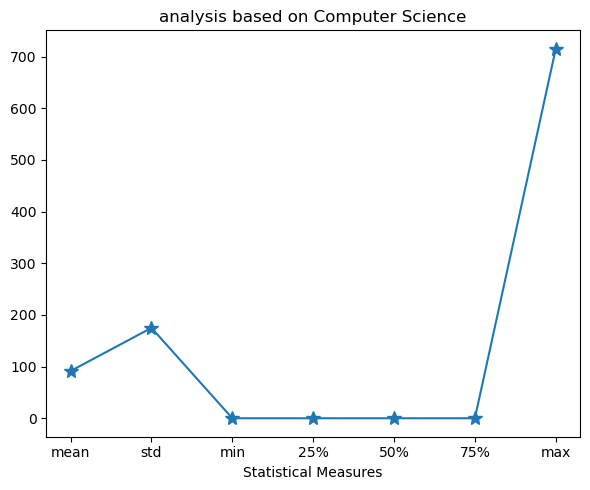

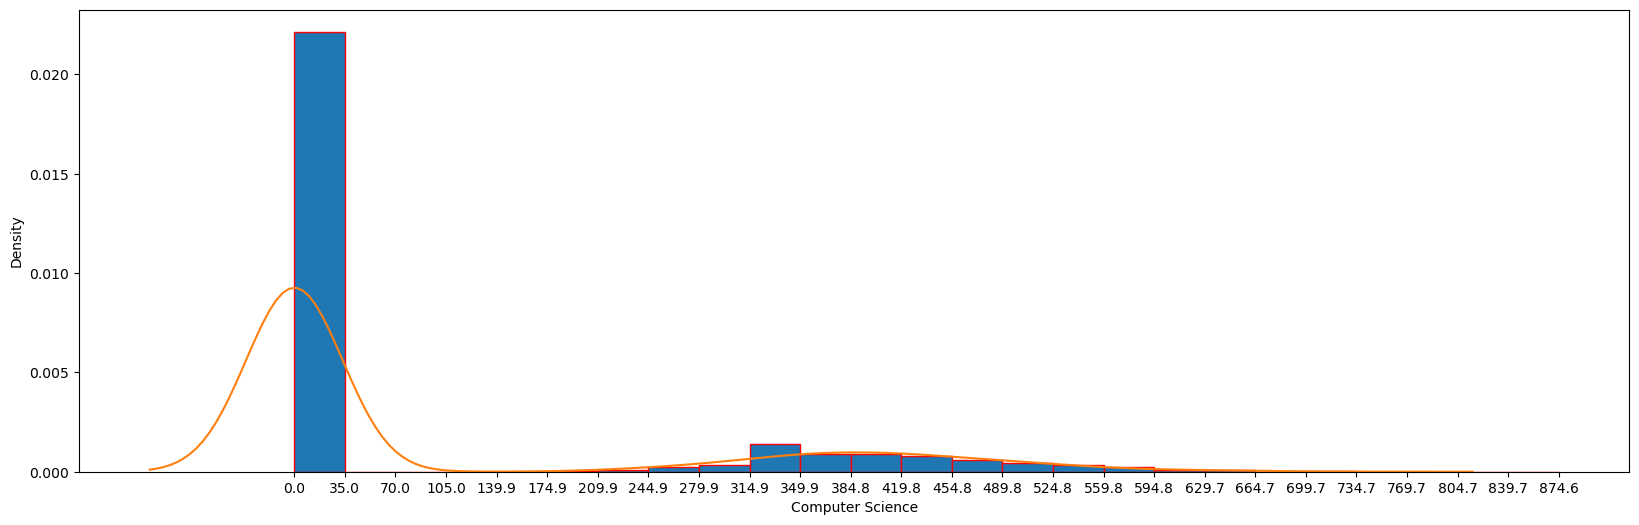

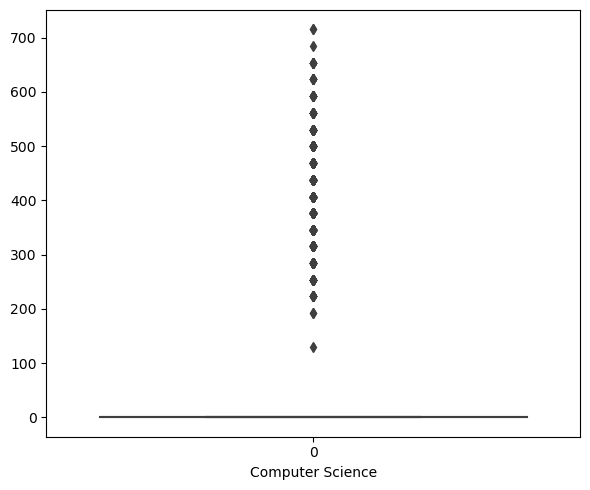

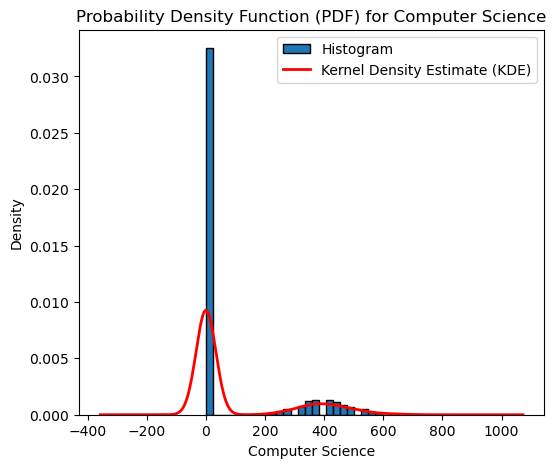

In [788]:
# summary Plot

plt.figure(figsize=(6, 5))
ameo["ComputerScience"].describe()[1:].plot(marker = '*', markersize = 10)
plt.title("analysis based on Computer Science")
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(ameo["ComputerScience"].min(), 
                 ameo["ComputerScience"].max()+ameo["ComputerScience"].std(),
                 ameo["ComputerScience"].std()/5)
plt.figure(figsize = (20,6))
plt.hist(ameo["ComputerScience"], bins = bins, edgecolor = "red", density = True)
plt.xticks(bins)
plt.xlabel("Computer Science")
plt.ylabel("Density")
sns.kdeplot(ameo["ComputerScience"])
plt.show()


# Box Plot

plt.figure(figsize=(6,5))
sns.boxplot(ameo["ComputerScience"])
plt.xlabel("Computer Science")
plt.tight_layout()
plt.show()

# PDF

salary_values = ameo["ComputerScience"]
plt.figure(figsize=(6, 5))
plt.hist(salary_values, density=True, bins=30, edgecolor='black', label='Histogram')
salary_values.plot.kde(color='red', linewidth=2, label='Kernel Density Estimate (KDE)')
plt.xlabel("Computer Science")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF) for Computer Science")
plt.legend()
plt.show()

###### Conclusion:
1. Summary Plot: A very high number of employees have scored veru badly in Computer Science.
2. Histogram: About 75% of employees have scored less than 35. 
3. Box Plot: Average is very low with a few number of people scoring very good in Computer Science.
4. PDF: It is a right skewed distribution.

#### 12. Age

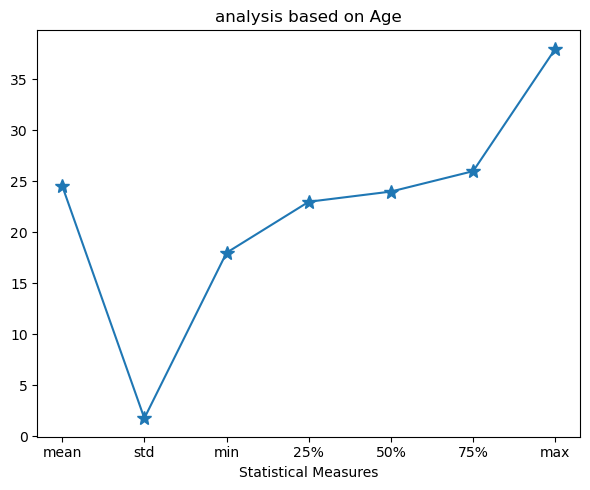

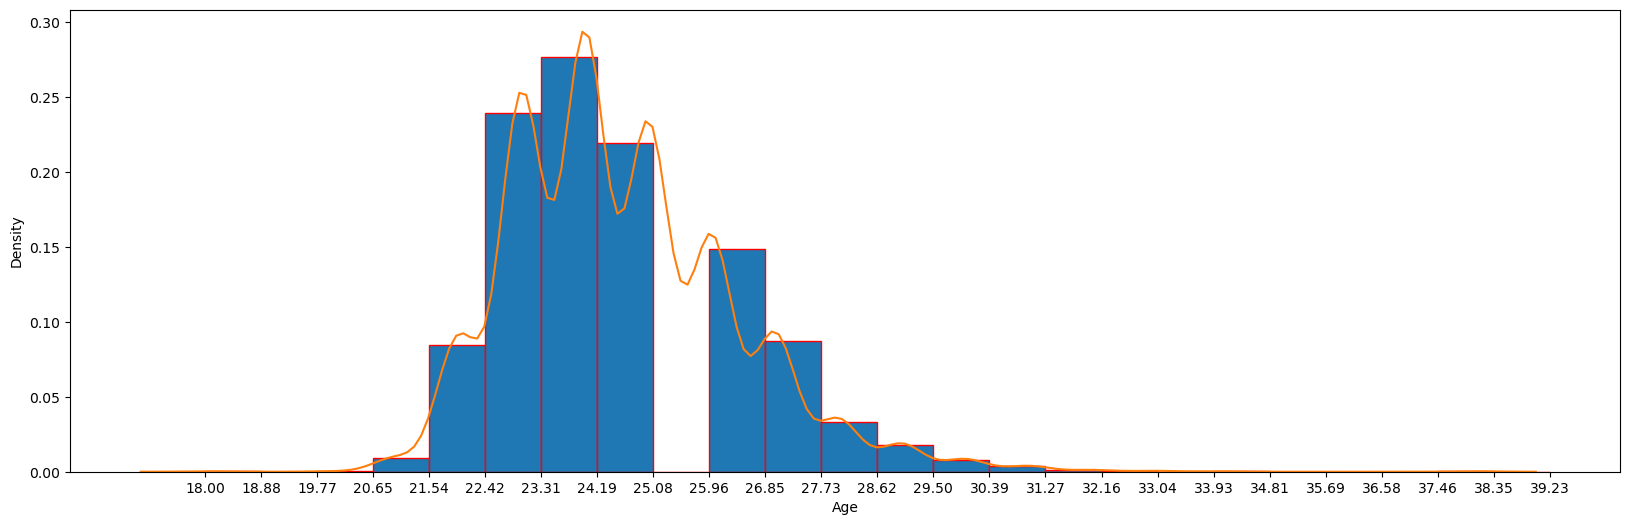

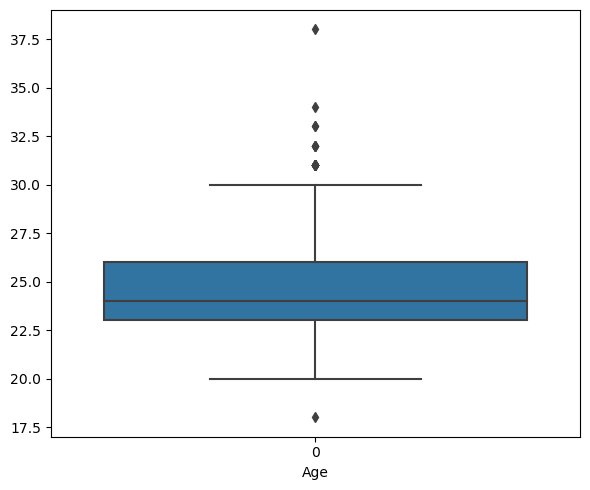

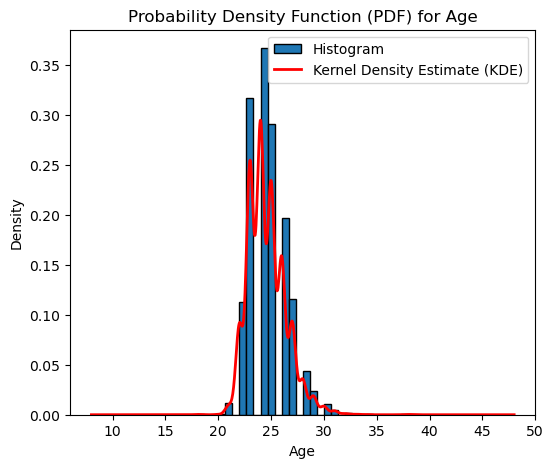

In [789]:
# summary Plot

plt.figure(figsize=(6, 5))
ameo["Age"].describe()[1:].plot(marker = '*', markersize = 10)
plt.title("analysis based on Age")
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(ameo["Age"].min(), 
                 ameo["Age"].max()+ameo["Age"].std(),
                 ameo["Age"].std()/2)
plt.figure(figsize = (20,6))
plt.hist(ameo["Age"], bins = bins, edgecolor = "red", density = True)
plt.xticks(bins)
plt.xlabel("Age")
plt.ylabel("Density")
sns.kdeplot(ameo["Age"])
plt.show()


# Box Plot

plt.figure(figsize=(6,5))
sns.boxplot(ameo["Age"])
plt.xlabel("Age")
plt.tight_layout()
plt.show()

# PDF

salary_values = ameo["Age"]
plt.figure(figsize=(6, 5))
plt.hist(salary_values, density=True, bins=30, edgecolor='black', label='Histogram')
salary_values.plot.kde(color='red', linewidth=2, label='Kernel Density Estimate (KDE)')
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF) for Age")
plt.legend()
plt.show()

###### Conclusion:
1. Summary Plot: The youngest employee working has a age of 17 years while the oldest employee is anout 40 
    years of age. 
2. Histogram: Age of most of the employees lies between 20 to 30 years of age.
3. Box Plot: Very few people have age above 30 years.
4. PDF: It is a uniformly distributed dataset.

#### 13. Tenure

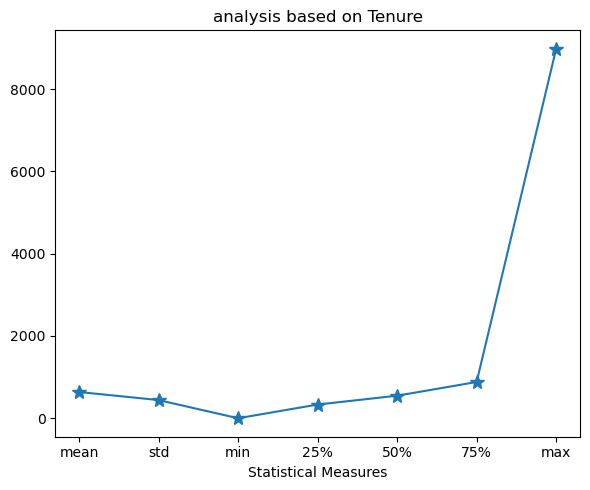

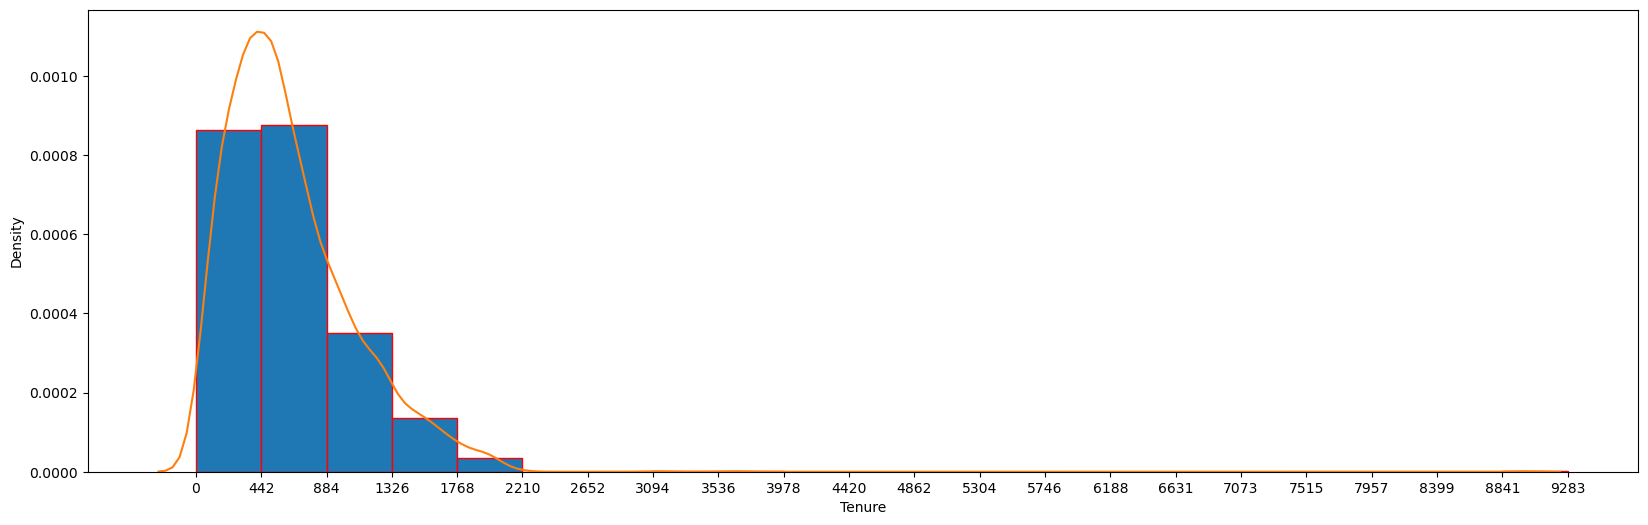

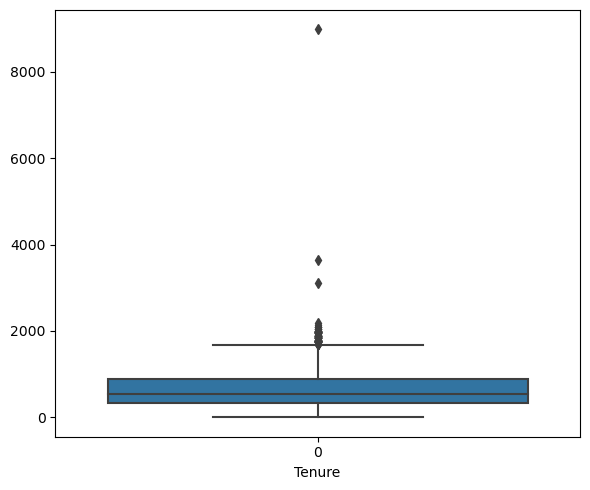

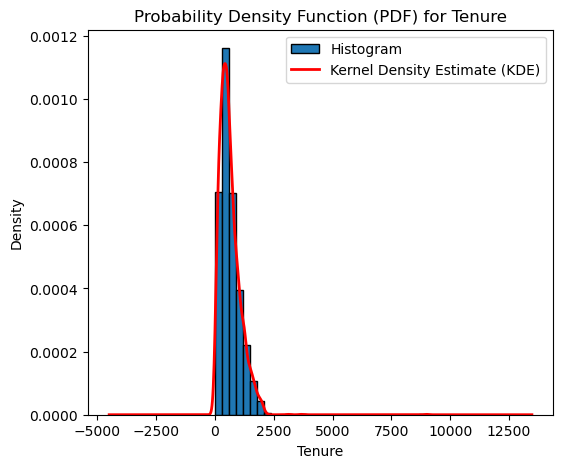

In [790]:
# summary Plot

plt.figure(figsize=(6, 5))
ameo["Tenure"].describe()[1:].plot(marker = '*', markersize = 10)
plt.title("analysis based on Tenure")
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(ameo["Tenure"].min(), 
                 ameo["Tenure"].max()+ameo["Tenure"].std(),
                 ameo["Tenure"].std())
plt.figure(figsize = (20,6))
plt.hist(ameo["Tenure"], bins = bins, edgecolor = "red", density = True)
plt.xticks(bins)
plt.xlabel("Tenure")
plt.ylabel("Density")
sns.kdeplot(ameo["Tenure"])
plt.show()


# Box Plot

plt.figure(figsize=(6,5))
sns.boxplot(ameo["Tenure"])
plt.xlabel("Tenure")
plt.tight_layout()
plt.show()

# PDF

salary_values = ameo["Tenure"]
plt.figure(figsize=(6, 5))
plt.hist(salary_values, density=True, bins=30, edgecolor='black', label='Histogram')
salary_values.plot.kde(color='red', linewidth=2, label='Kernel Density Estimate (KDE)')
plt.xlabel("Tenure")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF) for Tenure")
plt.legend()
plt.show()

###### Conclusion:
1. Summary Plot: Most of the employees resigns from the company within two year. 
2. Histogram: A substantial number of employees work from 2-5 years.
3. Box Plot: Very few employees stay in the company for more than 8 years.
4. PDF:It is a left skewed dataset.

## Categorical Data

Now before starting analysis of categorical data, we have observed that there are many unique values. Having such
a large number of unique values will certainly cause a mess in graphs and would be disfficult to draw a conclusion.
So we will consider just top 10 categories and other data would be clubbed in a single category called 'Others'.

In [791]:
top_categories = ameo["Designation"].value_counts().nlargest(10).index
ameo.loc[~ameo["Designation"].isin(top_categories), "Designation"] = "Miscellaneous"

top_categories = ameo["JobCity"].value_counts().nlargest(10).index
ameo.loc[~ameo["JobCity"].isin(top_categories), "JobCity"] = "Miscellaneous"

top_categories = ameo["10board"].value_counts().nlargest(10).index
ameo.loc[~ameo["10board"].isin(top_categories), "10board"] = "Miscellaneous"

top_categories = ameo["12board"].value_counts().nlargest(10).index
ameo.loc[~ameo["12board"].isin(top_categories), "12board"] = "Miscellaneous"

top_categories = ameo["CollegeState"].value_counts().nlargest(14).index
ameo["CollegeState"] = ameo["CollegeState"].astype("category")
ameo["CollegeState"] = ameo["CollegeState"].cat.set_categories(top_categories.union(["Miscellaneous"]))
ameo.loc[~ameo["CollegeState"].isin(top_categories), "CollegeState"] = "Miscellaneous"

top_categories = ameo["Specialization"].value_counts().nlargest(12).index
ameo["Specialization"] = ameo["Specialization"].astype("category")
ameo["Specialization"] = ameo["Specialization"].cat.set_categories(top_categories.union(["Miscellaneous"]))
ameo.loc[~ameo["Specialization"].isin(top_categories), "Specialization"] = "Miscellaneous"

#### 1. Designation

Here there are 2 categories. "system engineer" and "systems engineer", They both are same and might be typo error.
So we will club it into a single category.

In [792]:
combine = {"system engineer": "system engineer", "systems engineer": "system engineer"}
ameo["Designation"] = ameo["Designation"].replace(combine)

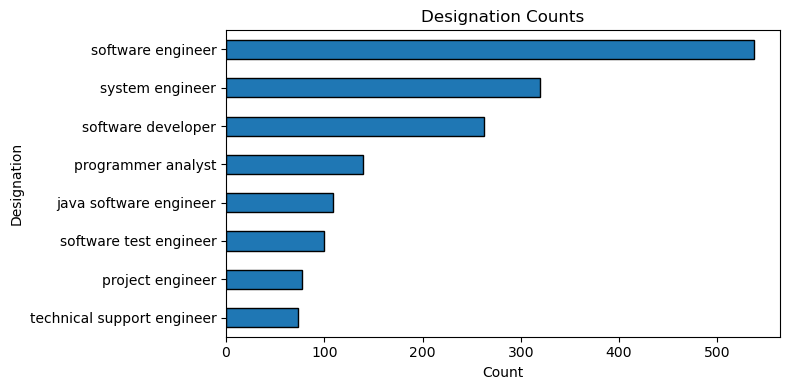

In [793]:
categories = ['systems engineer', 'system engineer','java software engineer', 'project engineer', 
               'software engineer', 'programmer analyst', 'software developer', 'technical support engineer', 
              'software test engineer']
Designation_ameo = ameo[ameo["Designation"].isin(categories)]

# Bar Plot

Designation_ameo["Designation"].value_counts().sort_values(ascending=True).plot(kind='barh',
    title="Designation Counts",figsize=(8, 4),edgecolor='black')

plt.ylabel("Designation")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

###### Conclusion:
Software engineers occupy maximum designations with System Engineer and Software Developers also having a 
considerable involvement. 

#### 2. Job City

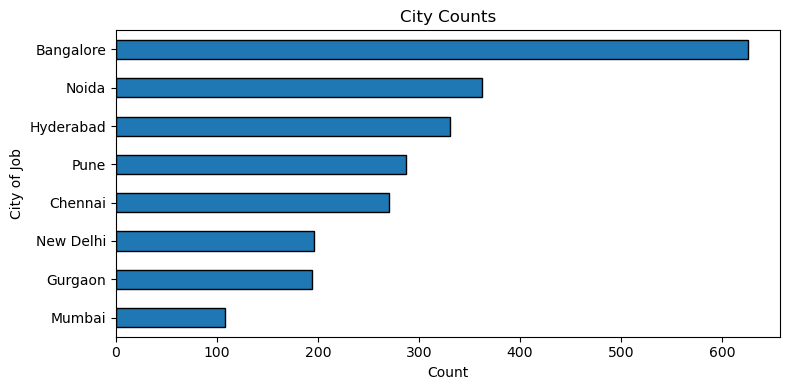

In [794]:
categories = ['Bangalore', 'Chennai', 'Gurgaon', 'Hyderabad', 'Noida', 'Pune', 'Mumbai', 'New Delhi']
JobCity_ameo = ameo[ameo["JobCity"].isin(categories)]

# Bar Plot

JobCity_ameo["JobCity"].value_counts().sort_values(ascending=True).plot(kind='barh',
    title="City Counts",figsize=(8, 4),edgecolor='black')

plt.ylabel("City of Job")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

###### Conclusion:
Maximum number of employees are from Bangalore while Mumbai has very less number of employees.

#### 3. Gender

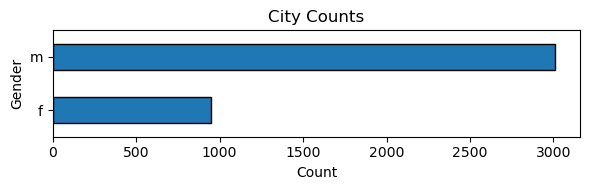

In [795]:
# Bar Plot
ameo["Gender"].value_counts().sort_values(ascending=True).plot(kind='barh',
    title="City Counts",figsize=(6, 2),edgecolor='black')

plt.ylabel("Gender")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

###### Conclusion:
Male employees are more than 3 times the female employees.

#### 4. 10th Board

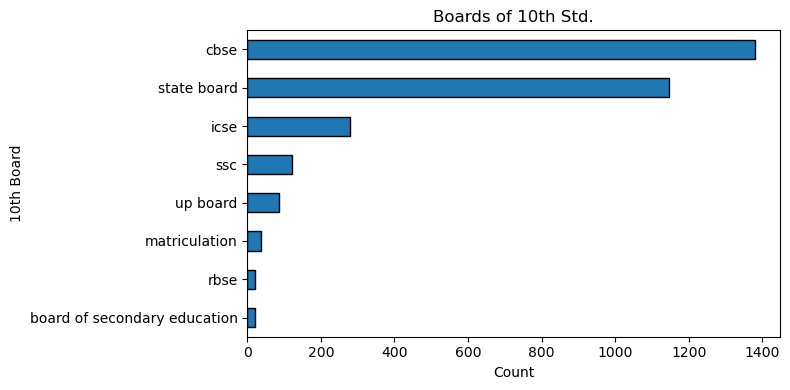

In [796]:
categories = ['cbse', 'state board', 'icse', 'ssc','matriculation', 'up board', 'rbse',
              'board of secondary education']
board_10_ameo = ameo[ameo["10board"].isin(categories)]

# Bar Plot

board_10_ameo["10board"].value_counts().sort_values(ascending=True).plot(kind='barh',
    title="Boards of 10th Std.",figsize=(8, 4),edgecolor='black')

plt.ylabel("10th Board")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

###### Conclusion:
About 2600 employees are from cbse and state board. All other boards account for about 1400 employees.

#### 5. 12th Board

In [797]:
combine = {"up board": "up board", "up": "up board"}
ameo["12board"] = ameo["12board"].replace(combine)

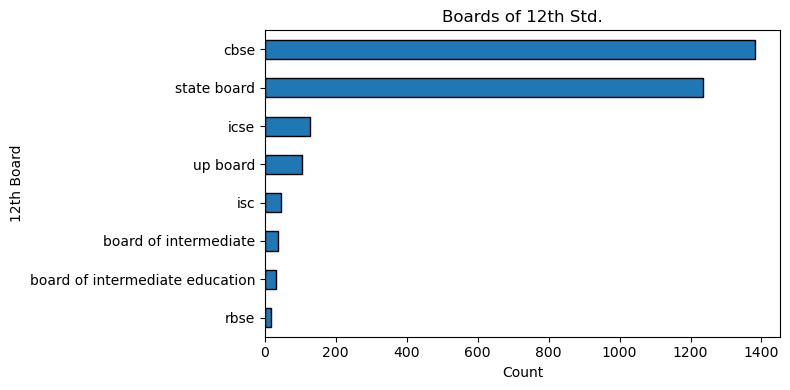

In [798]:
categories = ['cbse', 'state board', 'isc', 'icse', 'up board', 'board of intermediate', 'rbse',
       'board of intermediate education']
board_12_ameo = ameo[ameo["12board"].isin(categories)]

# Bar Plot

board_12_ameo["12board"].value_counts().sort_values(ascending=True).plot(kind='barh',
    title="Boards of 12th Std.",figsize=(8, 4),edgecolor='black')

plt.ylabel("12th Board")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

###### Conclusion:
CBSE and State Board Account for about 2800 employees.

#### 6. College City Tier

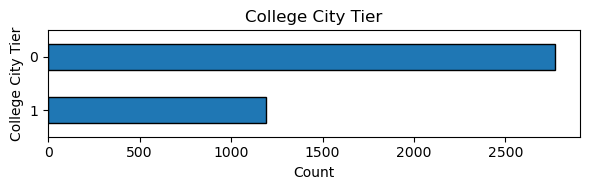

In [799]:
# Bar Plot
ameo["CollegeCityTier"].value_counts().sort_values(ascending=True).plot(kind='barh',
    title="College City Tier",figsize=(6, 2),edgecolor='black')

plt.ylabel("College City Tier")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

###### Conclusion:
Employees from colleges of '0' tier cities is little more than double the employees who have studied for '1'
tier cities

#### 7. College State

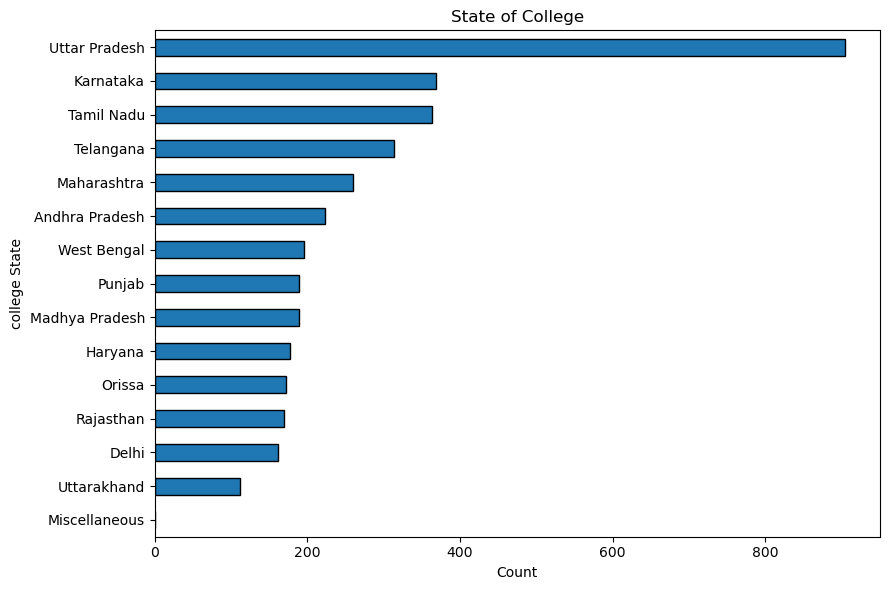

In [800]:
categories = ['Andhra Pradesh', 'Madhya Pradesh', 'Uttar Pradesh', 'Delhi', 'Karnataka',  'Orissa', 'Punjab', 
              'Rajasthan', 'Uttarakhand', 'Tamil Nadu', 'Telangana', 'Maharashtra', 'West Bengal', 'Haryana']
College_State_ameo = ameo[ameo["CollegeState"].isin(categories)]

# Bar Plot

College_State_ameo["CollegeState"].value_counts().sort_values(ascending=True).plot(kind='barh',
    title="State of College",figsize=(9, 6),edgecolor='black')

plt.ylabel("college State")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

###### Conclusion:
Maximum number of employees are from Uttar Pradesh whereas its neighbouring state Uttarakhand 
has minimum number of employees.

#### 8. College Tier

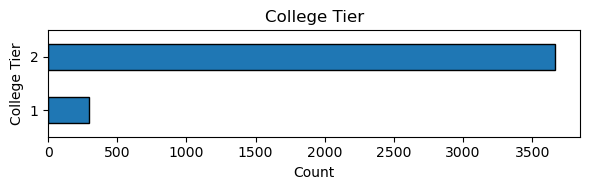

In [801]:
# Bar Plot
ameo["CollegeTier"].value_counts().sort_values(ascending=True).plot(kind='barh',
    title="College Tier",figsize=(6, 2),edgecolor='black')

plt.ylabel("College Tier")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

###### Conclusion:
Employees from '2' tier colleges is 9 times the employees from '1' tier colleges. 

#### 9. Specialization

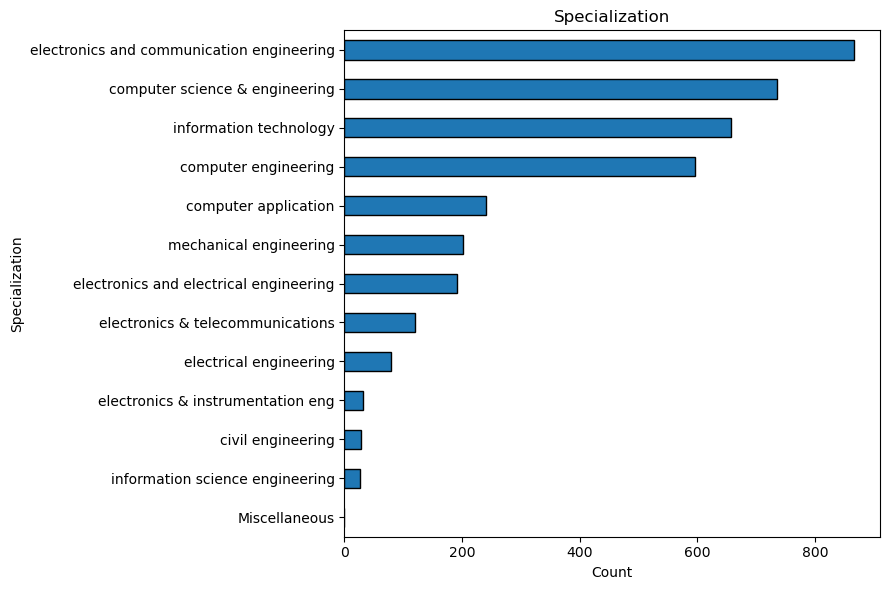

In [802]:
categories = ['computer engineering', 'electronics and communication engineering', 'information technology', 
               'computer science & engineering', 'mechanical engineering', 'computer application', 
               'electrical engineering', 'electronics & instrumentation eng', 'information science engineering', 
               'civil engineering', 'electronics and electrical engineering', 'electronics & telecommunications']
Specialization_ameo = ameo[ameo["Specialization"].isin(categories)]

# Bar Plot

Specialization_ameo["Specialization"].value_counts().sort_values(ascending=True).plot(kind='barh',
    title="Specialization",figsize=(9, 6),edgecolor='black')

plt.ylabel("Specialization")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

###### Conclusion:
Maximum number of employees are from computer and electronics background.

#### 10. Degree

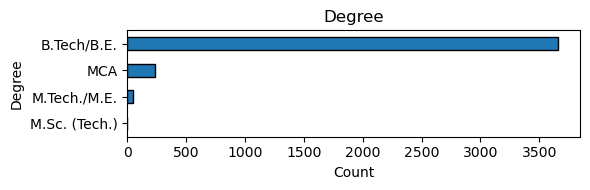

In [803]:
# Bar Plot
ameo["Degree"].value_counts().sort_values(ascending=True).plot(kind='barh',
    title="Degree",figsize=(6, 2),edgecolor='black')

plt.ylabel("Degree")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

###### Conclusion:
About 3700 employees have a B.E. or B.Tech degree while only about 300 employees have a masters degree.

# Removing Outliers 

In [804]:
def detection_outlier(column_name):
    sorted(column_name)
    Q1 = column_name.quantile(0.25)
    Q3 = column_name.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return lower_bound,upper_bound

cols = ['Salary','10percentage','12percentage','English', 'Logical','Quant','Domain', 'ComputerProgramming',
           'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness','agreeableness', 'extraversion', 
           'nueroticism', 'openess_to_experience', 'Age', 'Tenure']
ameo1 = ameo.copy()

for i in cols:
    lower_bound, upper_bound = detection_outlier(ameo1[i])
    outliers_index = ameo1[(ameo1[i] < lower_bound) | (ameo1[i] > upper_bound)].index
    ameo1 = ameo1.drop(outliers_index).reset_index(drop=True)

In [805]:
print(f'Observation with outliers: {ameo.shape[0]}')
print(f'Observations without outliers: {ameo1.shape[0]}')

Observation with outliers: 3958
Observations without outliers: 2639


# BIVARIATE

### Analysis with help of Bar Plot

#### 1. Average Salary for each Designation

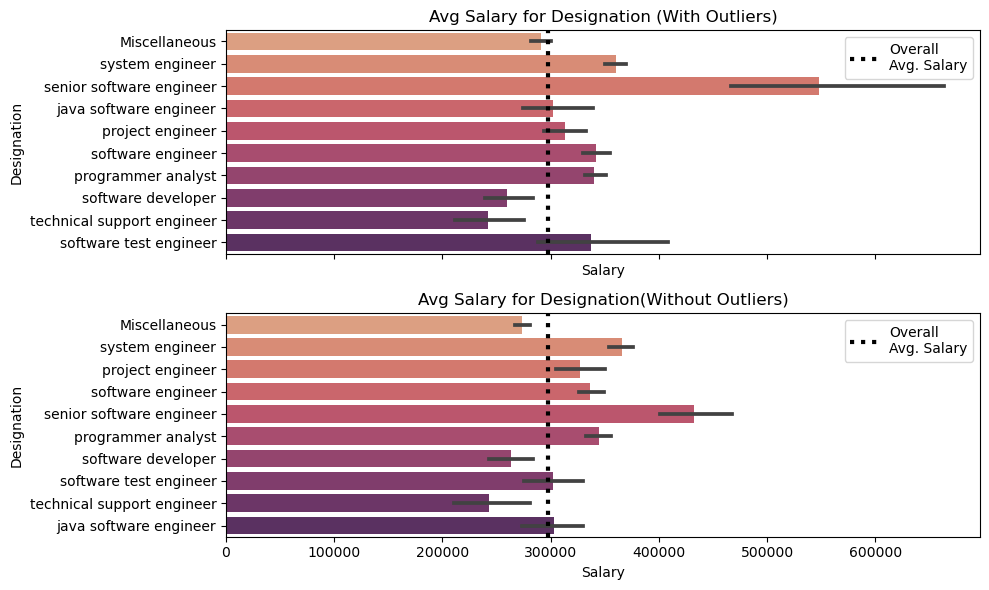

In [806]:
fig, ax = plt.subplots(2, 1, figsize = (10,6), sharex = True)

sns.barplot(x = "Salary", y = "Designation", data = ameo, palette = "flare", ax = ax[0])
ax[0].axvline(ameo1["Salary"].mean(), color = "black", linestyle = ':', linewidth = 3, 
              label = 'Overall\nAvg. Salary')
ax[0].set_title("Avg Salary for Designation (With Outliers)")
ax[0].legend()
ax[0].set_xlabel("Salary")

sns.barplot(x = "Salary", y = "Designation", data = ameo1, palette = "flare", ax = ax[1])
ax[1].axvline(ameo1["Salary"].mean(), color = "black", linestyle = ':', linewidth = 3, 
              label = "Overall\nAvg. Salary")
ax[1].set_title("Avg Salary for Designation(Without Outliers)")
ax[1].legend()
ax[1].set_xlabel("Salary")
plt.tight_layout()
plt.show()

###### Conclusion:
Technical Software Engineer and Software Developer have a salary less than the average. A greater Standard
Deviation can be noticed for Technical Support Engineer and Java Software Engineer.

#### 2. Average Salary for each Gender

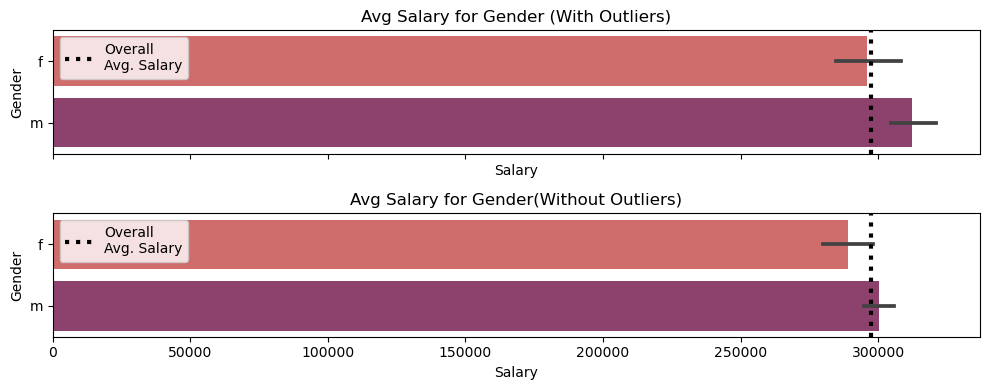

In [807]:
fig, ax = plt.subplots(2, 1, figsize = (10,4), sharex = True)

sns.barplot(x = "Salary", y = "Gender", data = ameo, palette = "flare", ax = ax[0])
ax[0].axvline(ameo1["Salary"].mean(), color = "black", linestyle = ':', linewidth = 3, 
              label = 'Overall\nAvg. Salary')
ax[0].set_title("Avg Salary for Gender (With Outliers)")
ax[0].legend()
ax[0].set_xlabel("Salary")

sns.barplot(x = "Salary", y = "Gender", data = ameo1, palette = "flare", ax = ax[1])
ax[1].axvline(ameo1["Salary"].mean(), color = "black", linestyle = ':', linewidth = 3, 
              label = "Overall\nAvg. Salary")
ax[1].set_title("Avg Salary for Gender(Without Outliers)")
ax[1].legend()
ax[1].set_xlabel("Salary")
plt.tight_layout()
plt.show()

###### Conclusion:
Female employees are paid a little less when compared with the male employees.

#### 3. Average Salary for each Degree

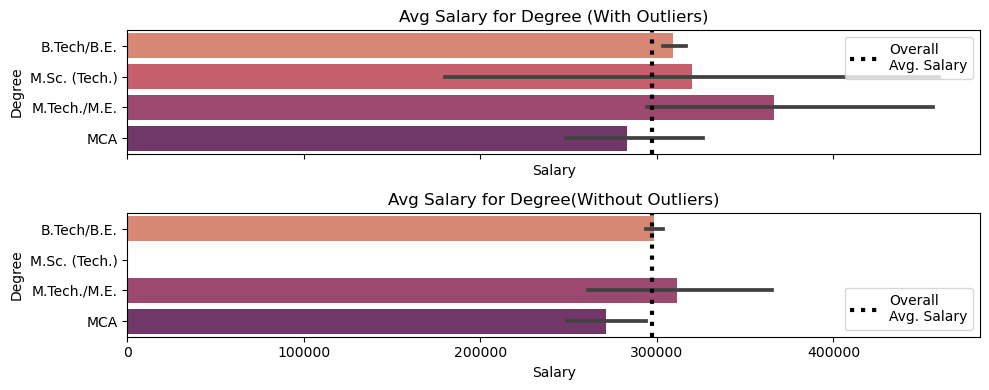

In [808]:
fig, ax = plt.subplots(2, 1, figsize = (10,4), sharex = True)

sns.barplot(x = "Salary", y = "Degree", data = ameo, palette = "flare", ax = ax[0])
ax[0].axvline(ameo1["Salary"].mean(), color = "black", linestyle = ':', linewidth = 3, 
              label = 'Overall\nAvg. Salary')
ax[0].set_title("Avg Salary for Degree (With Outliers)")
ax[0].legend()
ax[0].set_xlabel("Salary")

sns.barplot(x = "Salary", y = "Degree", data = ameo1, palette = "flare", ax = ax[1])
ax[1].axvline(ameo1["Salary"].mean(), color = "black", linestyle = ':', linewidth = 3, 
              label = "Overall\nAvg. Salary")
ax[1].set_title("Avg Salary for Degree(Without Outliers)")
ax[1].legend()
ax[1].set_xlabel("Salary")
plt.tight_layout()
plt.show()

###### Conclusion:
Employees with M. Tech or M.E, degree are paid the highest.

#### 4. Average Salary for each Specialization

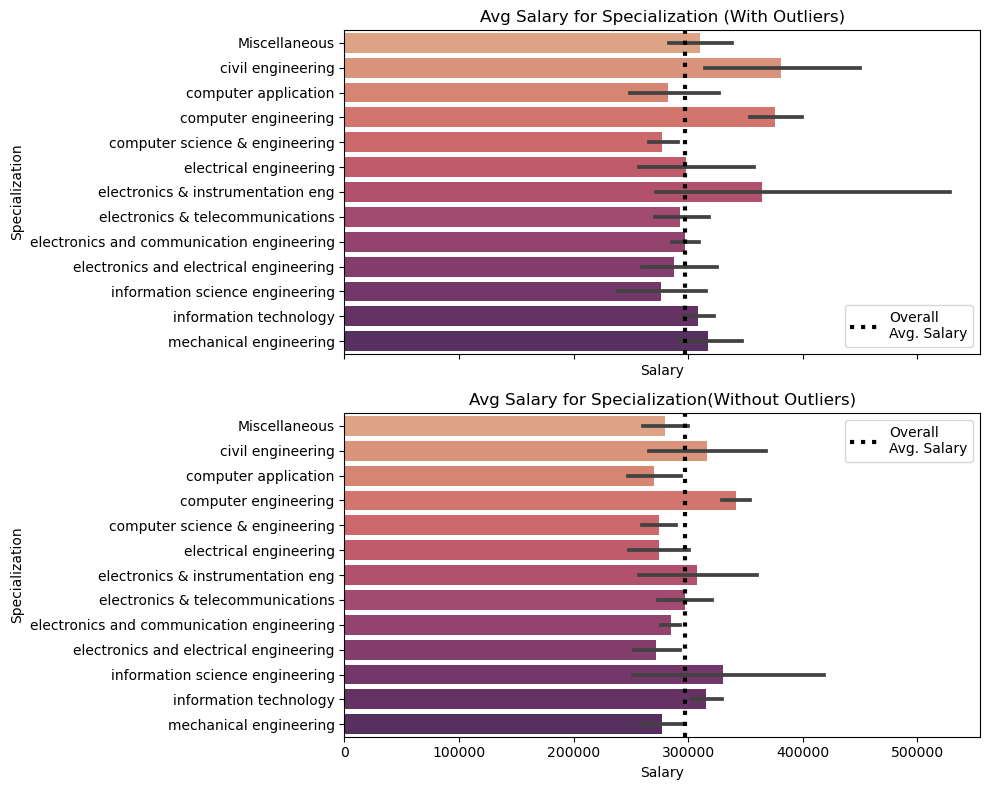

In [809]:
fig, ax = plt.subplots(2, 1, figsize = (10,8), sharex = True)

sns.barplot(x = "Salary", y = "Specialization", data = ameo, palette = "flare", ax = ax[0])
ax[0].axvline(ameo1["Salary"].mean(), color = "black", linestyle = ':', linewidth = 3, 
              label = 'Overall\nAvg. Salary')
ax[0].set_title("Avg Salary for Specialization (With Outliers)")
ax[0].legend()
ax[0].set_xlabel("Salary")

sns.barplot(x = "Salary", y = "Specialization", data = ameo1, palette = "flare", ax = ax[1])
ax[1].axvline(ameo1["Salary"].mean(), color = "black", linestyle = ':', linewidth = 3, 
              label = "Overall\nAvg. Salary")
ax[1].set_title("Avg Salary for Specialization(Without Outliers)")
ax[1].legend()
ax[1].set_xlabel("Salary")
plt.tight_layout()
plt.show()

###### Conclusion:
Almost employees with different backgrounds are paid evenly with a little deviation. But employees form 
Computer, Electronics and Civil background are getting maximum salary.

# SCATTER PLOTS

#### 1. Salary Based on 10th Percentage

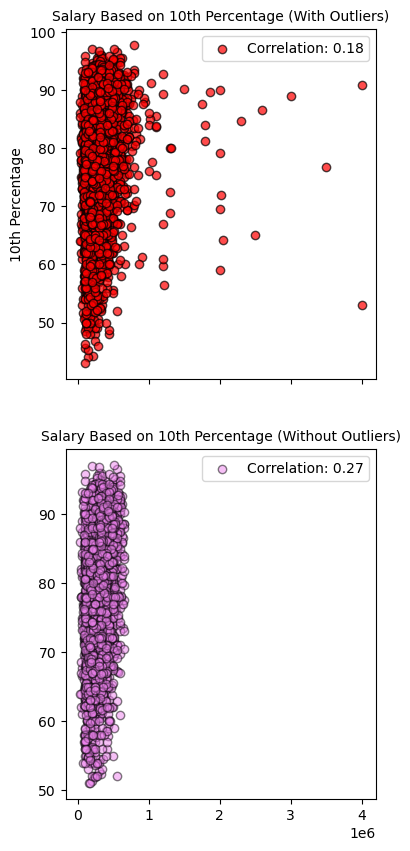

In [810]:
fig, ax = plt.subplots(2, 1, figsize = (4,10), sharex = True)

ax[0].scatter(ameo['Salary'], ameo['10percentage'],ec = 'k', color = 'red', alpha = 0.7,
              label = f"Correlation: {round(ameo[['Salary','10percentage']].corr().iloc[1,0],2)}")
ax[0].set_ylabel("10th Percentage")
ax[0].set_title("Salary Based on 10th Percentage (With Outliers)", size=10)
ax[0].legend()


ax[1].scatter(ameo1['Salary'],ameo1['10percentage'], ec = 'k', color = 'violet', alpha = 0.5,
              label = f"Correlation: {round(ameo1[['Salary','10percentage']].corr().iloc[1,0],2)}")
ax[1].set_title("Salary Based on 10th Percentage (Without Outliers)", size=10)
ax[1].legend()

###### Conclusion:
There is no relationship between 10th percentage and salaries of the employeees.

#### 2. Salary Based on 12th Percentage

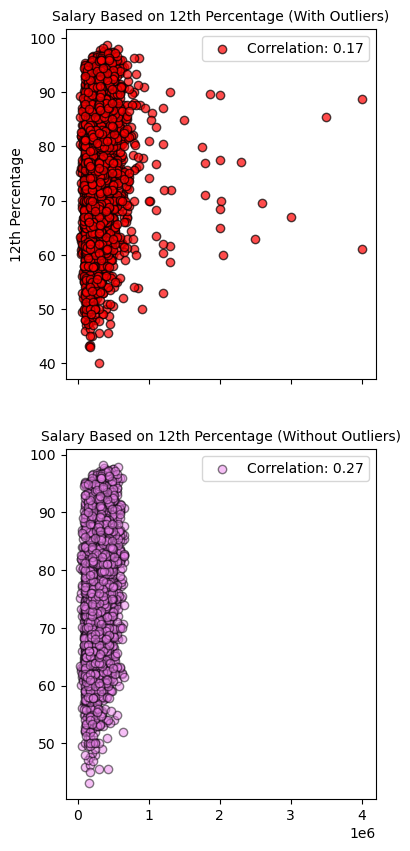

In [811]:
fig, ax = plt.subplots(2, 1, figsize = (4,10), sharex = True)

ax[0].scatter(ameo['Salary'], ameo['12percentage'],ec = 'k', color = 'red', alpha = 0.7,
              label = f"Correlation: {round(ameo[['Salary','12percentage']].corr().iloc[1,0],2)}")
ax[0].set_ylabel("12th Percentage")
ax[0].set_title("Salary Based on 12th Percentage (With Outliers)", size=10)
ax[0].legend()


ax[1].scatter(ameo1['Salary'],ameo1['12percentage'], ec = 'k', color = 'violet', alpha = 0.5,
              label = f"Correlation: {round(ameo1[['Salary','12percentage']].corr().iloc[1,0],2)}")
ax[1].set_title("Salary Based on 12th Percentage (Without Outliers)", size=10)
ax[1].legend()

###### Conclusion:
There is no relationship between 12th percentage and salaries of the employeees.

###### 3. Salary Based on College GPA

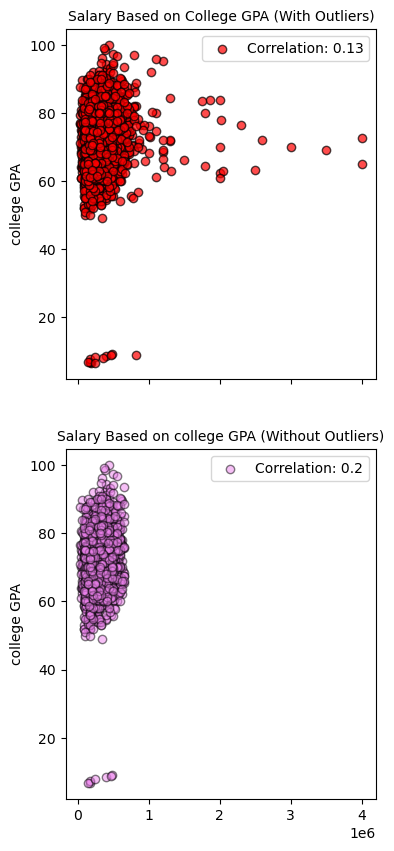

In [812]:
fig, ax = plt.subplots(2, 1, figsize = (4,10), sharex = True)

ax[0].scatter(ameo['Salary'], ameo['collegeGPA'],ec = 'k', color = 'red', alpha = 0.7,
              label = f"Correlation: {round(ameo[['Salary','collegeGPA']].corr().iloc[1,0],2)}")
ax[0].set_ylabel("college GPA")
ax[0].set_title("Salary Based on College GPA (With Outliers)", size=10)
ax[0].legend()


ax[1].scatter(ameo1['Salary'],ameo1['collegeGPA'], ec = 'k', color = 'violet', alpha = 0.5,
              label = f"Correlation: {round(ameo1[['Salary','collegeGPA']].corr().iloc[1,0],2)}")
ax[1].set_ylabel("college GPA")
ax[1].set_title("Salary Based on college GPA (Without Outliers)", size=10)
ax[1].legend()

###### Conclusion:
There is no relationship between College GPA and salaries of the employeees.

#### 4. Salary Based on Age

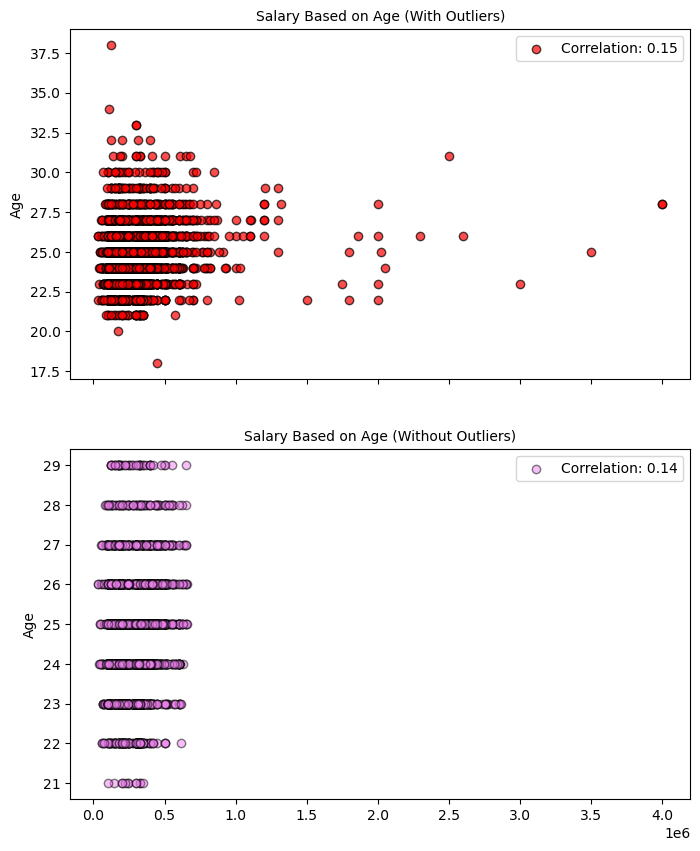

In [813]:
fig, ax = plt.subplots(2, 1, figsize = (8,10), sharex = True)

ax[0].scatter(ameo['Salary'], ameo['Age'],ec = 'k', color = 'red', alpha = 0.7,
              label = f"Correlation: {round(ameo[['Salary','Age']].corr().iloc[1,0],2)}")
ax[0].set_ylabel("Age")
ax[0].set_title("Salary Based on Age (With Outliers)", size=10)
ax[0].legend()


ax[1].scatter(ameo1['Salary'],ameo1['Age'], ec = 'k', color = 'violet', alpha = 0.5,
              label = f"Correlation: {round(ameo1[['Salary','Age']].corr().iloc[1,0],2)}")
ax[1].set_ylabel("Age")
ax[1].set_title("Salary Based on Age (Without Outliers)", size=10)
ax[1].legend()

###### Conclusion:
Even after removing the outliers there is no significant relation visible between the age of employees
and the salary they are being paid.

#### 5. Salary Based on Tenure

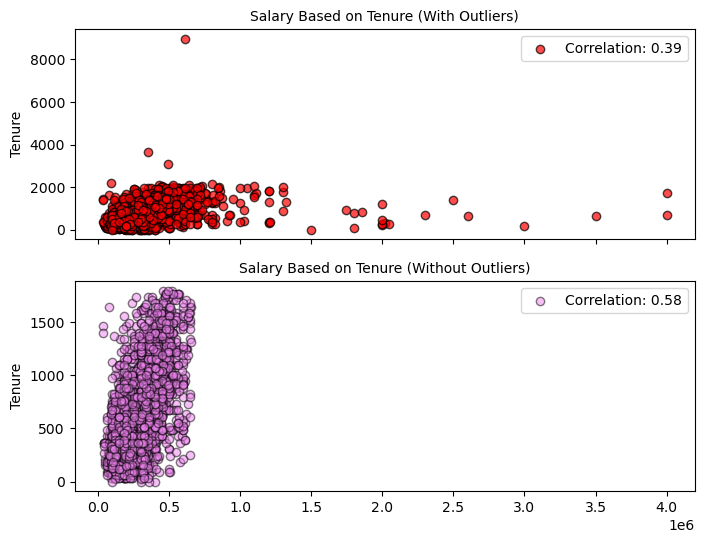

In [814]:
fig, ax = plt.subplots(2, 1, figsize = (8,6), sharex = True)

ax[0].scatter(ameo['Salary'], ameo['Tenure'],ec = 'k', color = 'red', alpha = 0.7,
              label = f"Correlation: {round(ameo[['Salary','Tenure']].corr().iloc[1,0],2)}")
ax[0].set_ylabel("Tenure")
ax[0].set_title("Salary Based on Tenure (With Outliers)", size=10)
ax[0].legend()


ax[1].scatter(ameo1['Salary'],ameo1['Tenure'], ec = 'k', color = 'violet', alpha = 0.5,
              label = f"Correlation: {round(ameo1[['Salary','Tenure']].corr().iloc[1,0],2)}")
ax[1].set_ylabel("Tenure")
ax[1].set_title("Salary Based on Tenure (Without Outliers)", size=10)
ax[1].legend()

###### Conclusion:
After removing outliers, correlation rises to 0.58 that implies as the tenure of employee increases, the 
salary also increases.

#### 6. Salary Based on English

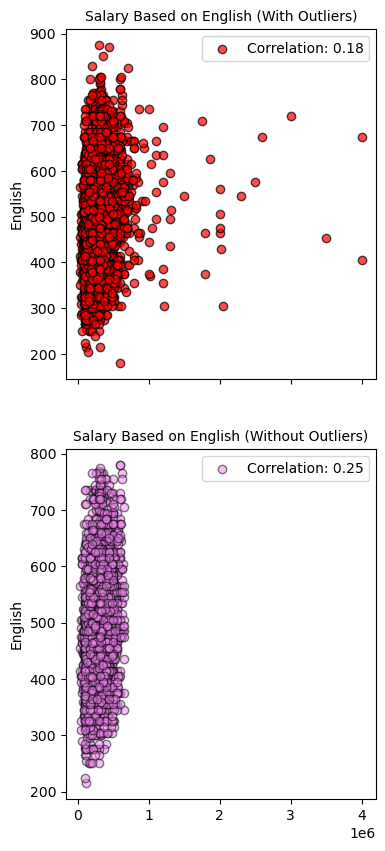

In [815]:
fig, ax = plt.subplots(2, 1, figsize = (4,10), sharex = True)

ax[0].scatter(ameo['Salary'], ameo['English'],ec = 'k', color = 'red', alpha = 0.7,
              label = f"Correlation: {round(ameo[['Salary','English']].corr().iloc[1,0],2)}")
ax[0].set_ylabel("English")
ax[0].set_title("Salary Based on English (With Outliers)", size=10)
ax[0].legend()


ax[1].scatter(ameo1['Salary'],ameo1['English'], ec = 'k', color = 'violet', alpha = 0.5,
              label = f"Correlation: {round(ameo1[['Salary','English']].corr().iloc[1,0],2)}")
ax[1].set_ylabel("English")
ax[1].set_title("Salary Based on English (Without Outliers)", size=10)
ax[1].legend()

###### Conclusion:
With 0.18 correlation, their is no relation between english score and salary of the employee.

#### 7. Salary Based on Quants

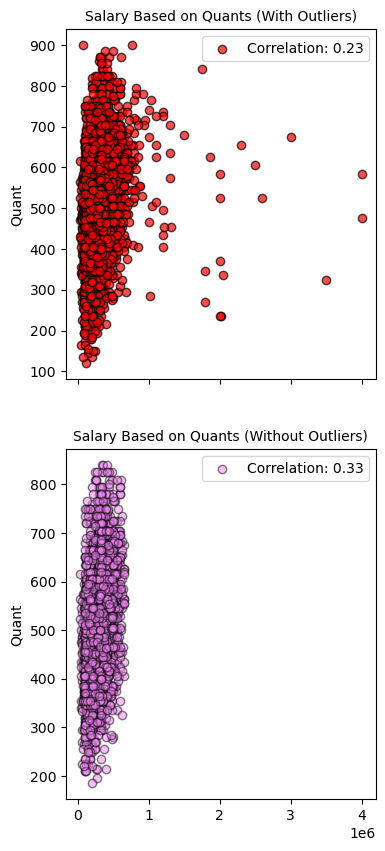

In [816]:
fig, ax = plt.subplots(2, 1, figsize = (4,10), sharex = True)

ax[0].scatter(ameo['Salary'], ameo['Quant'],ec = 'k', color = 'red', alpha = 0.7,
              label = f"Correlation: {round(ameo[['Salary','Quant']].corr().iloc[1,0],2)}")
ax[0].set_ylabel("Quant")
ax[0].set_title("Salary Based on Quants (With Outliers)", size=10)
ax[0].legend()


ax[1].scatter(ameo1['Salary'],ameo1['Quant'], ec = 'k', color = 'violet', alpha = 0.5,
              label = f"Correlation: {round(ameo1[['Salary','Quant']].corr().iloc[1,0],2)}")
ax[1].set_ylabel("Quant")
ax[1].set_title("Salary Based on Quants (Without Outliers)", size=10)
ax[1].legend()

###### Conclusion:
With 0.33 correlation after removing outliers, their is a very little relation between quant score and 
salary of the employee.

#### 8. Salary Based on Logical Reasoning

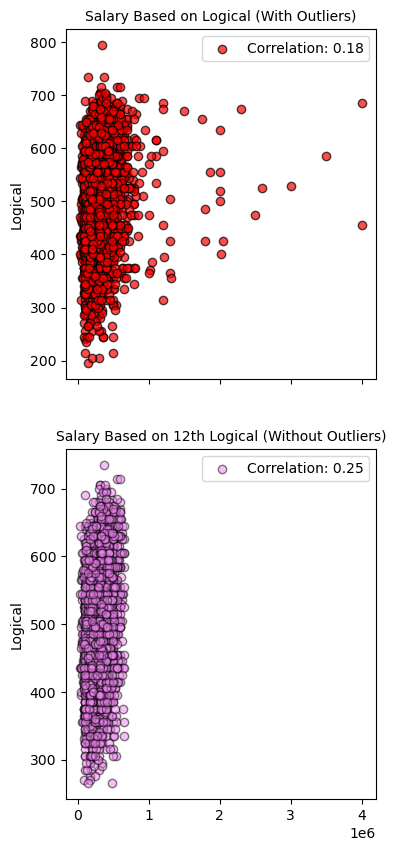

In [817]:
fig, ax = plt.subplots(2, 1, figsize = (4,10), sharex = True)

ax[0].scatter(ameo['Salary'], ameo['Logical'],ec = 'k', color = 'red', alpha = 0.7,
              label = f"Correlation: {round(ameo[['Salary','Logical']].corr().iloc[1,0],2)}")
ax[0].set_ylabel("Logical")
ax[0].set_title("Salary Based on Logical (With Outliers)", size=10)
ax[0].legend()


ax[1].scatter(ameo1['Salary'],ameo1['Logical'], ec = 'k', color = 'violet', alpha = 0.5,
              label = f"Correlation: {round(ameo1[['Salary','Logical']].corr().iloc[1,0],2)}")
ax[1].set_ylabel("Logical")
ax[1].set_title("Salary Based on 12th Logical (Without Outliers)", size=10)
ax[1].legend()

###### Conclusion:
With 0.25 correlation, their is no relation between Logical Reasoning score and salary of the employee.

# STACKED BAR PLOT

#### 1. Gender vs Degree

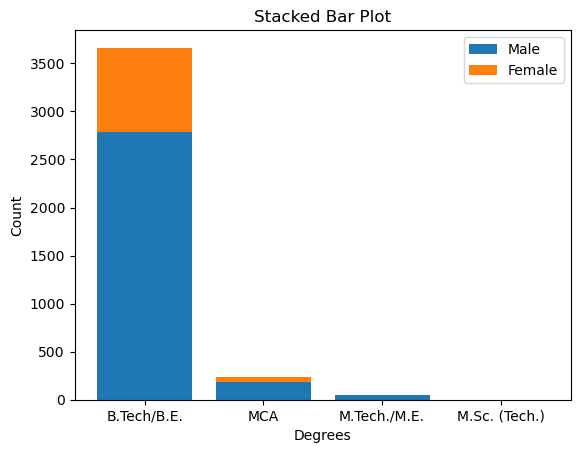

In [818]:
male_counts = ameo[ameo["Gender"] == "m"].groupby("Degree").size().reindex(ameo["Degree"], fill_value=0)
female_counts = ameo[ameo["Gender"] == "f"].groupby("Degree").size().reindex(ameo["Degree"], fill_value=0)

# Plotting stacked bar plot
plt.bar(ameo["Degree"], male_counts, label='Male')
plt.bar(ameo["Degree"], female_counts, bottom=male_counts, label='Female')

# Adding labels and title
plt.xlabel('Degrees')
plt.ylabel('Count')
plt.title('Stacked Bar Plot')
plt.legend()

# Show the plot
plt.show()

###### Conclusion:
Female employees from Bachelors and MCA degree are very less compared to male employees from same degree.
There are no female employees with a M.Tech or a M.E. degree.

# RESEARCH QUESTIONS

### Question 1:
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up
jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to
2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [942]:
pd.set_option('display.max_rows', None)
ameo2 = pd.read_csv("/Users/sayedrizwan/Downloads/data.xlsx - Sheet1.csV")

In [919]:
ameo2["Designation"].value_counts()

software engineer                         539
software developer                        265
system engineer                           205
programmer analyst                        139
systems engineer                          118
java software engineer                    111
software test engineer                    100
project engineer                           77
technical support engineer                 76
senior software engineer                   72
java developer                             67
test engineer                              57
web developer                              54
application developer                      52
assistant manager                          52
network engineer                           51
data analyst                               49
business analyst                           49
engineer                                   47
android developer                          46
associate software engineer                46
programmer                        

In [920]:
List1 = ameo2["Designation"].values.tolist()
List2 = []

for i in List1:
    if "program" in i:
        List2.append(i)
        
len(List2)

189

In [921]:
List3 = ameo2["Designation"].values.tolist()
List4 = []

for i in List3:
    if "software" in i:
        List4.append(i)
        
len(List4)

1274

In [922]:
List5 = ameo2["Designation"].values.tolist()
List6 = []

for i in List5:
    if "hardware" in i:
        List6.append(i)
        
len(List6)

8

In [923]:
List7 = ameo2["Designation"].values.tolist()
List8 = []

for i in List7:
    if "associate" in i and "engineer" in i:
        List8.append(i)
        
len(List8)

67

In [924]:
list(set(List2))

['programmer analyst trainee',
 'senior programmer',
 'programmer analyst',
 'software programmer',
 'programmer',
 'program analyst trainee',
 'cnc programmer',
 'assistant programmer',
 'program manager']

In [925]:
list(set(List4))

['associate software engineer',
 'jr. software engineer',
 'software engineer trainee',
 'software enginner',
 'software development engineer',
 'java software engineer',
 'senior software engineer',
 'jr. software developer',
 'assistant software engineer',
 'software programmer',
 'software eng',
 'software engineer associate',
 'software engineer',
 'embedded software engineer',
 'delivery software engineer',
 'software engg',
 'principal software engineer',
 'software quality assurance analyst',
 'software devloper',
 'software architect',
 'junior software engineer',
 'junior software developer',
 'associate software engg',
 'software trainee',
 'software test engineer',
 'software designer',
 'senior software developer',
 'software tester',
 'software test engineer (etl)',
 'software executive',
 'software developer',
 'trainee software developer',
 'software engineere',
 'trainee software engineer',
 'software trainee engineer',
 'software engineering associate',
 'software engi

In [926]:
list(set(List6))

['hardware engineer']

In [927]:
list(set(List8))

['associate software engineer',
 'associate engineer',
 'associate system engineer',
 'software engineer associate',
 'associate test engineer',
 'software engineering associate']

In [928]:
ameo2['Designation'] = ameo2['Designation'].replace(['programmer analyst trainee','programmer analyst',
         'program analyst trainee'], 'program analyst')

In [929]:
ameo2['Designation'] = ameo2['Designation'].replace(['associate software engineer', 'jr. software engineer',
     'software engineer trainee', 'software enginner', 'software development engineer',
     'java software engineer',
     'senior software engineer',
     'assistant software engineer',
     'software eng',
     'software engineer associate',
     'embedded software engineer',
     'delivery software engineer',
     'software engg',
     'principal software engineer',
     'junior software engineer',
     'software test engineer',
     'software test engineer (etl)',
     'software engineere',
     'trainee software engineer',
     'software trainee engineer',
     'software engineering associate',
     'software engineer analyst',
     'software test engineerte'], 'software engineer')

In [930]:
ameo2['Designation'] = ameo2['Designation'].replace(['associate engineer',
 'associate system engineer',
 'associate test engineer'], 'associate engineer')

In [931]:
df = ameo2[(ameo2['Designation'].isin(['program analyst', 'hardware engineer',
                                      'associate engineer', 'software engineer']))]

In [932]:
df.shape

(1111, 39)

/var/folders/0_/0_2bc2sd1fg8gfxg468gc4qc0000gn/T/ipykernel_791/1260830599.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


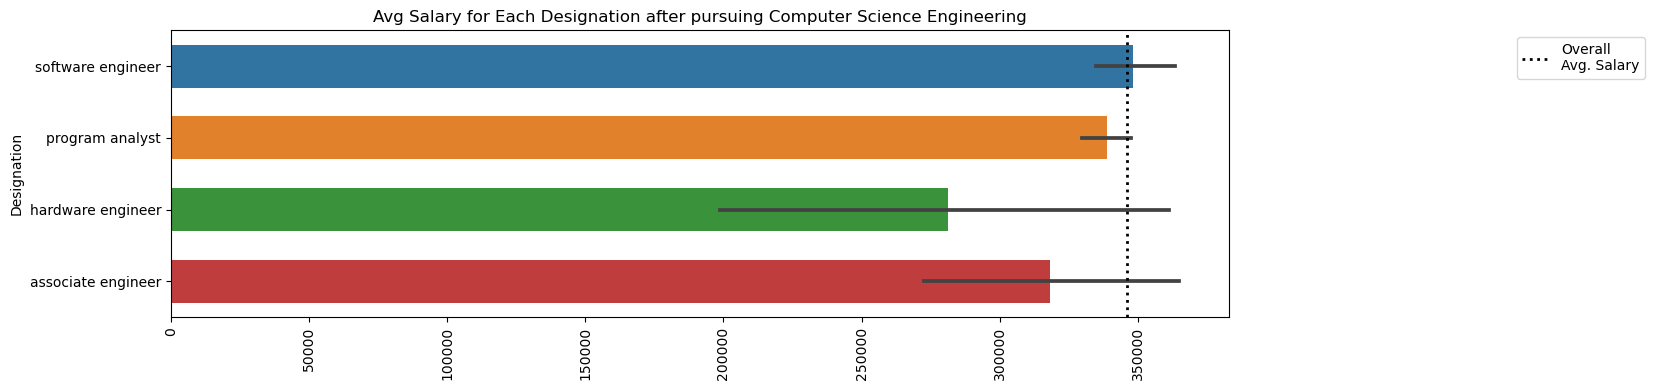

In [933]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.barplot(x='Salary', y='Designation', data=df, width = 0.6)
ax.axvline(df['Salary'].mean(), color='k',
           linestyle=':',
           linewidth=2, label='Overall\nAvg. Salary')
ax.set_title('Avg Salary for Each Designation after pursuing Computer Science Engineering')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [934]:
df["DOL"].replace("present", "2015-12-31", inplace = True)
df["DOL"] = pd.to_datetime(df["DOL"])
df["DOJ"] = pd.to_datetime(df["DOJ"])
df["GraduationYear"] = pd.to_datetime(df['GraduationYear'])
df = df.drop(df[df['DOL'] < df['DOJ']].index)

/var/folders/0_/0_2bc2sd1fg8gfxg468gc4qc0000gn/T/ipykernel_791/3341936353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DOL"].replace("present", "2015-12-31", inplace = True)
/var/folders/0_/0_2bc2sd1fg8gfxg468gc4qc0000gn/T/ipykernel_791/3341936353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DOL"] = pd.to_datetime(df["DOL"])
/var/folders/0_/0_2bc2sd1fg8gfxg468gc4qc0000gn/T/ipykernel_791/3341936353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [935]:
df["Join_Year"] = df["DOJ"].dt.year

In [936]:
df['Grad_Year'] = df['GraduationYear'].dt.microsecond %10000

#### We have to study only those employees who have done Computer Science. So we will be deleting all the rows with "-1" values. As "-1" value indiates that the employee have not opted for computer Science.

In [937]:
df = df[df["ComputerScience"] != -1]

/var/folders/0_/0_2bc2sd1fg8gfxg468gc4qc0000gn/T/ipykernel_791/1260830599.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


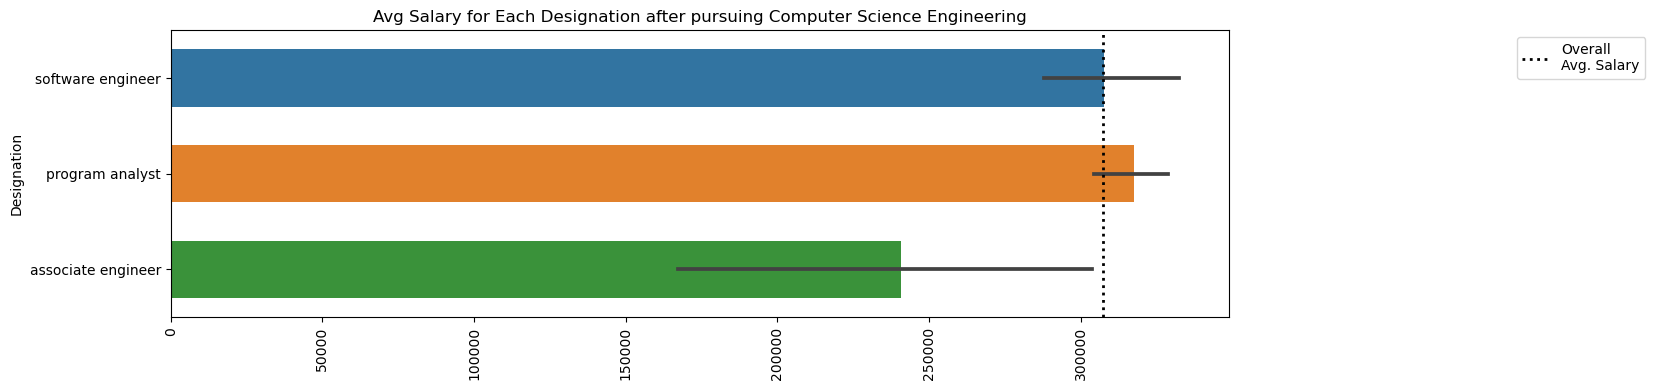

In [938]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.barplot(x='Salary', y='Designation', data=df, width = 0.6)
ax.axvline(df['Salary'].mean(), color='k',
           linestyle=':',
           linewidth=2, label='Overall\nAvg. Salary')
ax.set_title('Avg Salary for Each Designation after pursuing Computer Science Engineering')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [939]:
df["Analysis"] = ((df["Salary"] > 250000) & (df["Salary"] < 300000))

In [940]:
df["Analysis"].value_counts()

False    286
True      13
Name: Analysis, dtype: int64

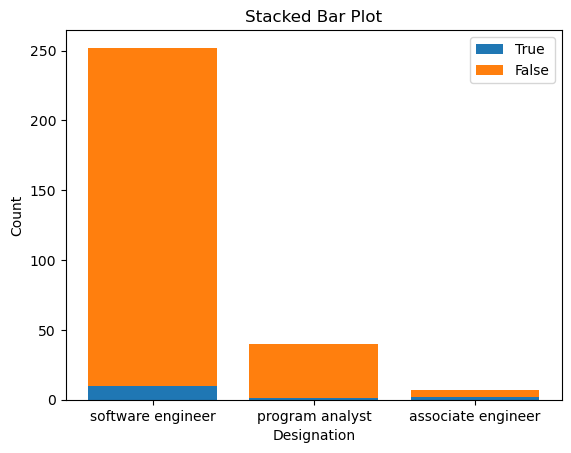

In [943]:
True_Value = df[df["Analysis"] == 1].groupby("Designation").size().reindex(df["Designation"], fill_value=0)
False_Value = df[df["Analysis"] == 0].groupby("Designation").size().reindex(df["Designation"], fill_value=0)

plt.bar(df["Designation"], True_Value, label='True')
plt.bar(df["Designation"], False_Value, bottom=True_Value, label='False')

plt.xlabel('Designation')
plt.ylabel('Count')
plt.title('Stacked Bar Plot')
plt.legend()

#### Conclusion:
After we study "Value_counts" and Stacked Data Plot, we have came to a conclusion that out of 299 employees who
had studies "Computer Science" only 13 employees stand True to the fact that Employee earns between 2,50,000
and  3,00,000. 
With 13 out of 299, it comes to a 4.38% cases that hold true the claim made by TOI.
So we can claim that the the article published is wrong.

# Question 2

#### Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [947]:
ameo3 = pd.read_csv("/Users/sayedrizwan/Downloads/data.xlsx - Sheet1.csV")

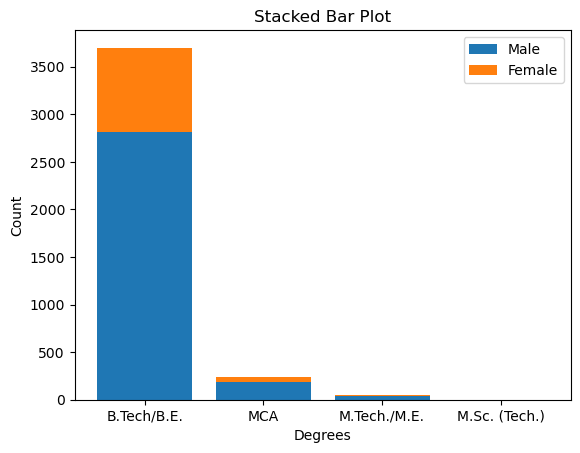

In [946]:
male_counts = ameo3[ameo3["Gender"] == "m"].groupby("Degree").size().reindex(ameo3["Degree"], fill_value=0)
female_counts = ameo3[ameo3["Gender"] == "f"].groupby("Degree").size().reindex(ameo3["Degree"], fill_value=0)

# Plotting stacked bar plot
plt.bar(ameo3["Degree"], male_counts, label='Male')
plt.bar(ameo3["Degree"], female_counts, bottom=male_counts, label='Female')

# Adding labels and title
plt.xlabel('Degrees')
plt.ylabel('Count')
plt.title('Stacked Bar Plot')
plt.legend()

# Show the plot
plt.show()

In [949]:
ameo3["Gender"].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

#### Conclusion:
Out of 3600 employees who have Bachelors degree, about 2900 are male and 700 are Female.
For MCA, M.Tech and M.E., there are very few females, males are about 4 times that of female.